In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')

In [2]:
# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

### churn 데이터 생성 완료!
- churn 데이터를 생성하여 고객 해지 여부(Y,N)를 정의함!
- 이를 기반으로 데이터 분석 시작!

#### 데이터 설명

- sha2_hash - 서비스 번호
- SVC_USE_DAYS_GRP - 서비스 이용기간
- MEDIA_NM_GRP - 상품 매체명
- PROD_NM_GRP - 상품명
- PROD_OLD_YN - 구)상품 이용 유무
- PROD_ONE_PLUS_YN - 추가 이용 유무
- AGMT_KIND_NM - 약정 종류
- STB_RES_1M_YN - 셋탑박스 휴면 유무
- SVOD_SCRB_CNT_GRP - 월정액 가입 수
- PAID_CHNL_SCRB_CNT_GRP - 유료채널 가입 수
- SCRB_PATH_NM_GRP – 유치경로
- INHOME_RATE - 집돌이 지수
- AGMT_END_SEG - 약정 종료일(구간)
- AGMT_END_YMD - 약정 종료일
- TOTAL_USED_DAYS - 총 사용일수
- TV_SCRB - TV사용 댓수
- ANALOG_SCRB - 아날로그 이용 댓수
- DIGITAL_SCRB - 디지털 이용 댓수
- TOTAL_INTERNET_SCRB - 인터넷 이용 댓수
- GIGA_INTERNET_SCRB - 기가인터넷 이용 댓수
- BUNDLE_YN - 번들 유무
- DIGITAL_GIGA_YN - 디지털&기가 결합 유무
- DIGITAL_ALOG_YN - 디지털&아날로그 결합 유무
- TV_I_CNT - TV, 인터넷 전체 이용댓수
- CH_LAST_DAYS_BF_GRP - 최근 시청일(구간)
- VOC_TOTAL_MONTH1_YN - 1개월내 VOC 인입 유무
- VOC_STOP_CANCEL_MONTH1_YN - 1개월내 해지VOC 인입유무
- AGE_GRP10 - 연령 구간
- EMAIL_RECV_CLS_NM - 이메일 수신 유무
- SMS_SEND_CLS_NM - SMS 수신 유무
- CH_HH_AVG_MONTH1 - 1개월 평균 채널 시청시간
- CH_25_RATIO_MONTH1 - 1개월 간 지역채널 시청률
- CH_25_RATIO_MEAN_3MM - 3개월 간 지역채널 시청률
- CH_FAV_RANK1 - 선호채널 랭크
- KIDS_USE_PV_MONTH1 - 1개월 키즈 진입횟수
- NFX_USE_YN - 넷플릭스 이용유무
- YTB_USE_YN - 유튜브 이용유무
- p_mt - 해당 월
- churn(target) - 해지 여부

## EDA 진행

In [ ]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing2")

In [3]:
# df = pd.read_csv("data/TPS_cancel_202302_202312.csv")

In [4]:
df

,sha2_hash,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,p_mt,churn
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,12개월~24개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 12개월이상,20240325,733,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,3개월내없음,N,N,60대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,2,N
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,Y,0건,0건,I/B,0.0,약정만료전 9~12개월,20240325,764,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,Y,N,60대,수신,수신,6.72,3.33,3.33,JTBC,0.00,N,N,3,N
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 9~12개월,20240325,794,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,3.71,3.71,기타,0.00,N,N,4,N
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.0,약정만료전 9~12개월,20240325,825,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,3.57,3.57,기타,0.00,N,N,5,N
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.0,약정만료전 6~9개월,20240325,855,2.00,0.00,2.00,1.00,1.00,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,4.03,6.51,6.51,기타,0.00,N,N,6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476020,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료후 12개월이상,20200405,2338,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.03,0.01,0.01,KBS1,0.00,N,N,8,N
22476021,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료후 12개월이상,20200405,2368,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.91,0.00,0.00,기타,1.00,N,N,9,N
22476022,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.0,약정만료후 12개월이상,20200405,2399,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,2주일전,Y,N,50대,수신,수신,1.97,0.19,0.19,기타,0.00,N,N,10,N
22476023,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,0.0,약정만료후 12개월이상,20200405,2429,1.00,0.00,1.00,0.00,0.00,N,N,N,1.00,3개월내없음,N,N,50대,수신,수신,0.00,0.00,0.00,기타,0.00,N,N,11,N


1. 데이터 기본 확인

In [8]:
# 데이터 기본 확인
print("✅ 데이터 정보")
display(df.info())
print("")

print("✅ 데이터 통계 요약 (연속형)")
display(df.describe())
print("")

# sha2_hash와 AMGT_END_YMD는 고유값이 너무 많기 때문에 제거하고 확인
print("✅ 범주형 변수 카디널리티 확인")
categorical_columns = df.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'AGMT_END_YMD']

for col in categorical_columns:
  if col not in exclude_cols:
    unique_values = df[col].unique()
    print(f"{col}의 고유값들 ▶️ {unique_values}")
print("")

print("✅ 데이터 결측치 확인 (이미 제거)")
display(df.isnull().sum())
print("")

✅ 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22476025 entries, 0 to 22476024
Data columns (total 39 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   sha2_hash                  object 
 1   SVC_USE_DAYS_GRP           object 
 2   MEDIA_NM_GRP               object 
 3   PROD_NM_GRP                object 
 4   PROD_OLD_YN                object 
 5   PROD_ONE_PLUS_YN           object 
 6   AGMT_KIND_NM               object 
 7   STB_RES_1M_YN              object 
 8   SVOD_SCRB_CNT_GRP          object 
 9   PAID_CHNL_CNT_GRP          object 
 10  SCRB_PATH_NM_GRP           object 
 11  INHOME_RATE                object 
 12  AGMT_END_SEG               object 
 13  AGMT_END_YMD               object 
 14  TOTAL_USED_DAYS            int64  
 15  TV_SCRB                    float64
 16  ANALOG_SCRB                float64
 17  DIGITAL_SCRB               float64
 18  TOTAL_INTERNET_SCRB        float64
 19  GIGA_INTERNET_SCRB         floa

None


✅ 데이터 통계 요약 (연속형)


,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,TV_I_CNT,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,KIDS_USE_PV_MONTH1,p_mt
count,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00
mean,2760.33,1.78,0.02,1.76,0.50,0.13,2.28,4.55,2.41,2.41,0.40,6.99
std,1219.27,2.81,0.18,2.80,1.03,0.36,3.43,4.11,5.29,5.29,4.45,3.16
min,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00
25%,2095.00,1.00,0.00,1.00,0.00,0.00,1.00,1.16,0.00,0.00,0.00,4.00
50%,2920.00,2.00,0.00,1.00,0.00,0.00,2.00,3.62,0.83,0.83,0.00,7.00
75%,3648.00,2.00,0.00,2.00,1.00,0.00,3.00,7.03,2.89,2.89,0.00,10.00
max,45289.00,235.00,29.00,235.00,102.00,21.00,275.00,35.39,128.87,100.00,4621.00,12.00



✅ 범주형 변수 카디널리티 확인
SVC_USE_DAYS_GRP의 고유값들 ▶️ ['12개월~24개월미만' '24개월~ 36개월미만' '36개월 이상' '6개월미만' '6개월~12개월미만']
MEDIA_NM_GRP의 고유값들 ▶️ ['HD' 'UHD' '기타']
PROD_NM_GRP의 고유값들 ▶️ ['이코노미' '프리미엄' '베이직' '스탠다드' '세이버' '기타']
PROD_OLD_YN의 고유값들 ▶️ ['N' 'Y']
PROD_ONE_PLUS_YN의 고유값들 ▶️ ['Y' 'N']
AGMT_KIND_NM의 고유값들 ▶️ ['신규' '재약정' '약정승계' '약정축소' '약정연장' '약정갱신' '정보없음']
STB_RES_1M_YN의 고유값들 ▶️ ['N' 'Y']
SVOD_SCRB_CNT_GRP의 고유값들 ▶️ ['0건' '1건' '3건 이상' '2건']
PAID_CHNL_CNT_GRP의 고유값들 ▶️ ['0건' '1건' '2건' '3건 이상']
SCRB_PATH_NM_GRP의 고유값들 ▶️ ['I/B' '일반상담' '현장경로' 'O/B' '기타' '임직원' '직영몰' '정보없음' '전략채널' '렌탈제휴']
INHOME_RATE의 고유값들 ▶️ ['10.0' '0.0' '20.0' '30.0' '50.0' '60.0' '80.0' '70.0' '40.0' '알수없음'
 '90.0' '100.0']
AGMT_END_SEG의 고유값들 ▶️ ['약정만료전 12개월이상' '약정만료전 9~12개월' '약정만료전 6~9개월' '약정만료전 3~6개월' '약정만료후 1개월~2개월'
 '약정만료후 2개월~3개월' '약정만료후 3~6개월' '약정만료후 6~9개월' '약정만료후 9~12개월' '약정만료후 12개월이상'
 '약정만료전 2~3개월' '약정만료전 1~2개월' '약정만료전 1개월' '약정만료 1개월' '기타']
BUNDLE_YN의 고유값들 ▶️ ['Y' 'N']
DIGITAL_GIGA_YN의 고유값들 ▶️ ['Y' 'N']
DIGITAL_ALOG_YN의 고유값들 ▶️

sha2_hash                    0
SVC_USE_DAYS_GRP             0
MEDIA_NM_GRP                 0
PROD_NM_GRP                  0
PROD_OLD_YN                  0
PROD_ONE_PLUS_YN             0
AGMT_KIND_NM                 0
STB_RES_1M_YN                0
SVOD_SCRB_CNT_GRP            0
PAID_CHNL_CNT_GRP            0
SCRB_PATH_NM_GRP             0
INHOME_RATE                  0
AGMT_END_SEG                 0
AGMT_END_YMD                 0
TOTAL_USED_DAYS              0
TV_SCRB                      0
ANALOG_SCRB                  0
DIGITAL_SCRB                 0
TOTAL_INTERNET_SCRB          0
GIGA_INTERNET_SCRB           0
BUNDLE_YN                    0
DIGITAL_GIGA_YN              0
DIGITAL_ALOG_YN              0
TV_I_CNT                     0
CH_LAST_DAYS_BF_GRP          0
VOC_TOTAL_MONTH1_YN          0
VOC_STOP_CANCEL_MONTH1_YN    0
AGE_GRP10                    0
EMAIL_RECV_CLS_NM            0
SMS_SEND_CLS_NM              0
CH_HH_AVG_MONTH1             0
CH_25_RATIO_MONTH1           0
CH_25_RA

2. 타겟 변수 분석


✅ 타겟 변수 분포:
churn
N    22333414
Y      142611
Name: count, dtype: int64

✅ 타겟 변수 비율(%):
churn
N   99.37
Y    0.63
Name: proportion, dtype: float64


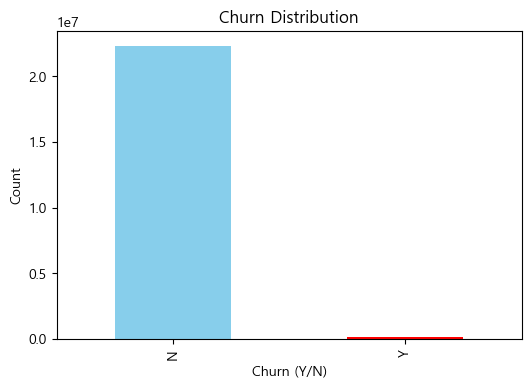

In [10]:
# 타겟 변수 분석
if 'churn' in df.columns:
    print("\n✅ 타겟 변수 분포:")
    print(df['churn'].value_counts())  # Y와 N의 개수 확인
    print("\n✅ 타겟 변수 비율(%):")
    print(df['churn'].value_counts(normalize=True) * 100)  # 비율 계산

    # 타겟 변수 시각화
    plt.figure(figsize=(6, 4))
    df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'red'])
    plt.title("Churn Distribution")
    plt.xlabel("Churn (Y/N)")
    plt.ylabel("Count")
    plt.show()

- 타겟 변수인 churn의 분포를 확인한 결과, N의 비율이 압도적으로 높음
- 심각한 데이터 불균형을 의미하며, 이는 예측 모델링에서 성능 저하로 이어질 가능성이 있음.
- 왜냐하면 데이터 불균형은 모델이 다수 클래스인 N을 과도하게 예측하도록 학습될 위험이 있기 때문임. 이는 소수 클래스 Y를 아예 예측 못할 수도 있음.
- 이는 언더 샘플링, 오버 샘플링(SMOTE, SMOTENC)과 같은 방식을 사용하여 데이터 불균형을 해결하거나, 모델 학습 시 클랙스 불균형에 맞게 가중치를 설정하여 균형 잡힌 학습을 유도해야함.

3. 범주형 변수의 값 분포 확인 (시각화)

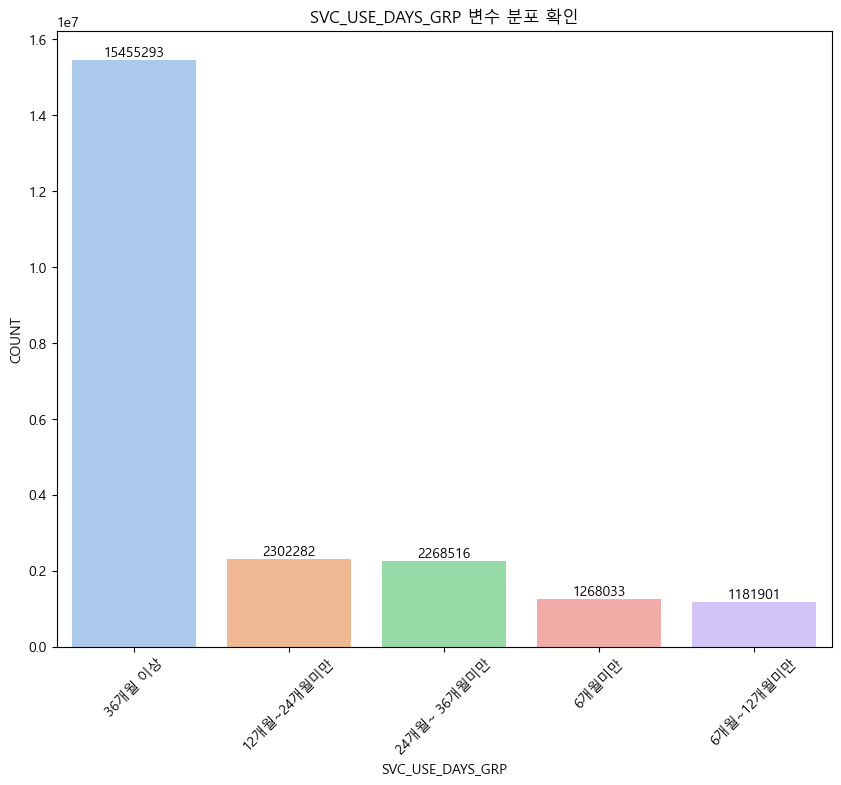

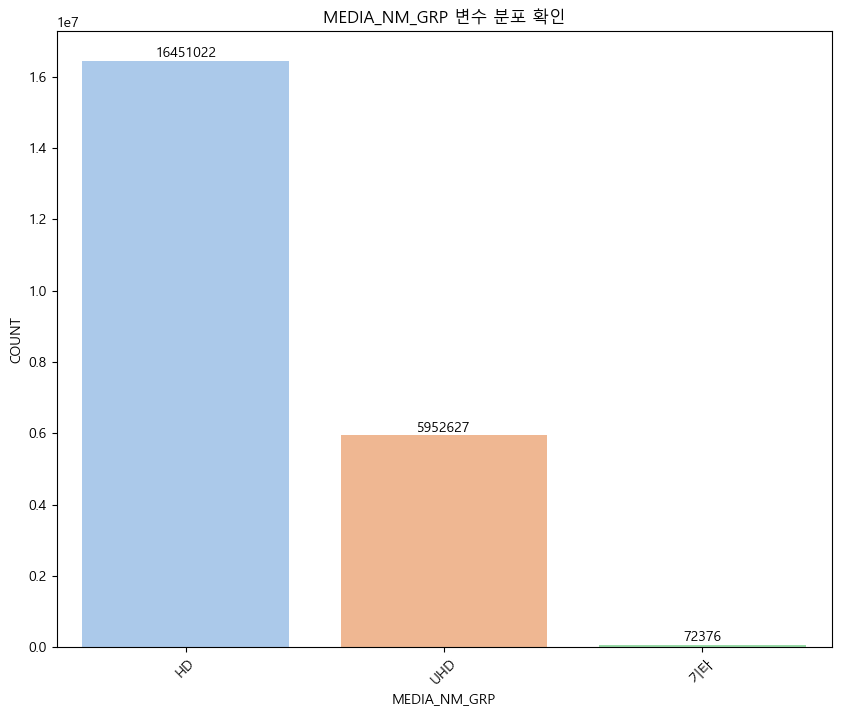

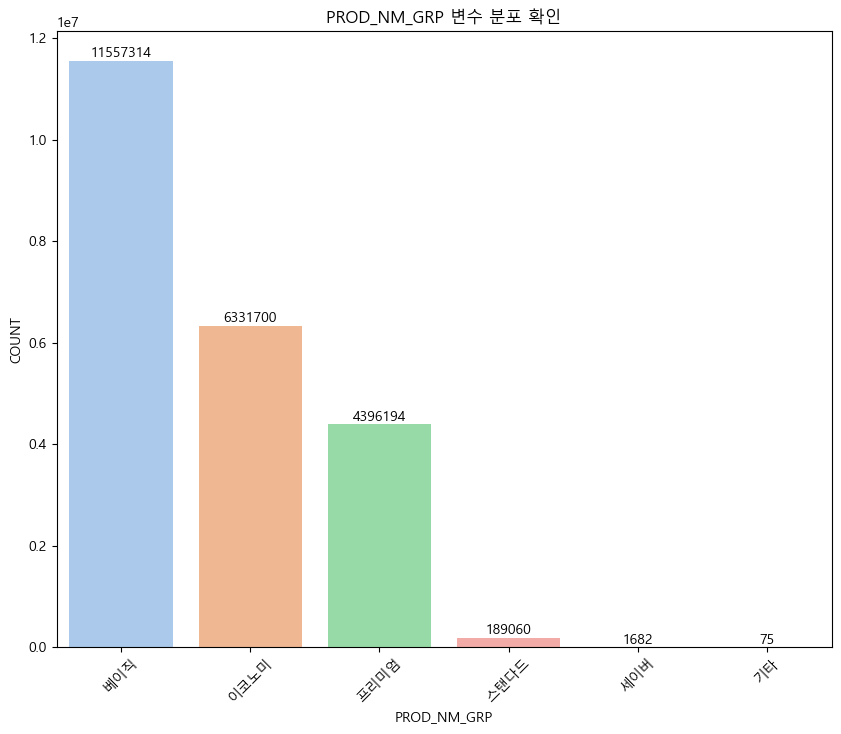

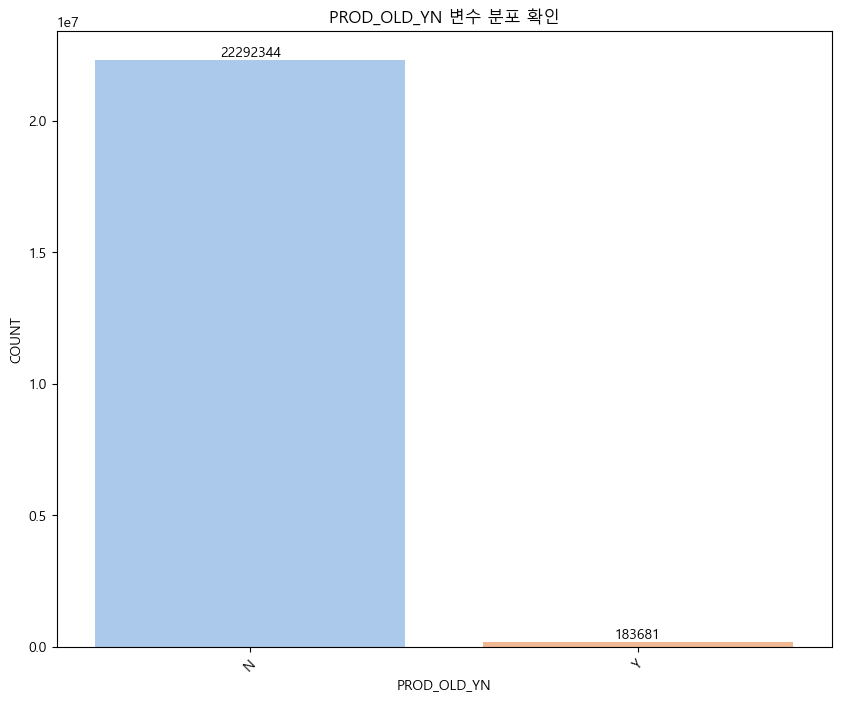

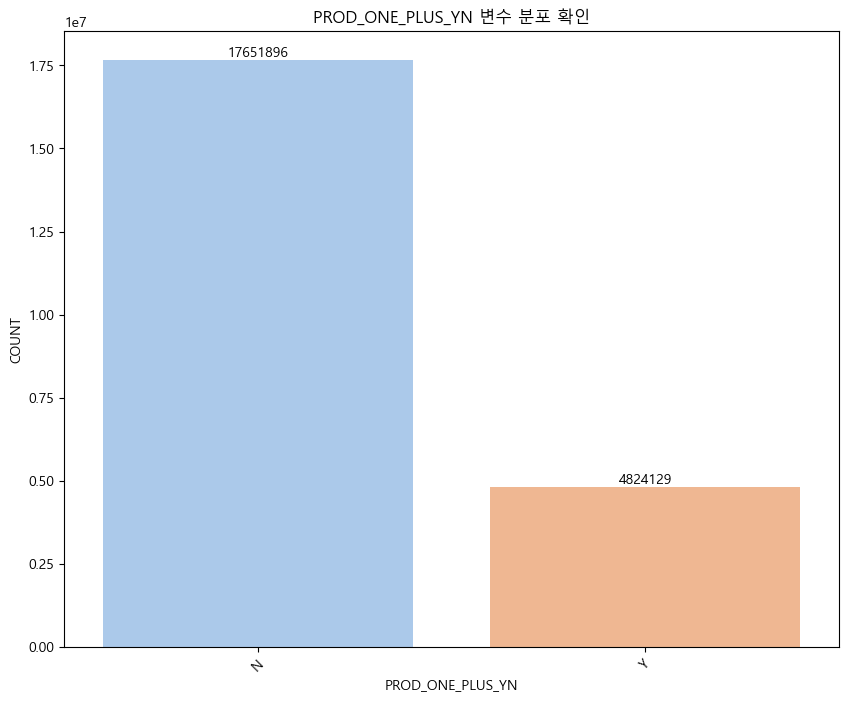

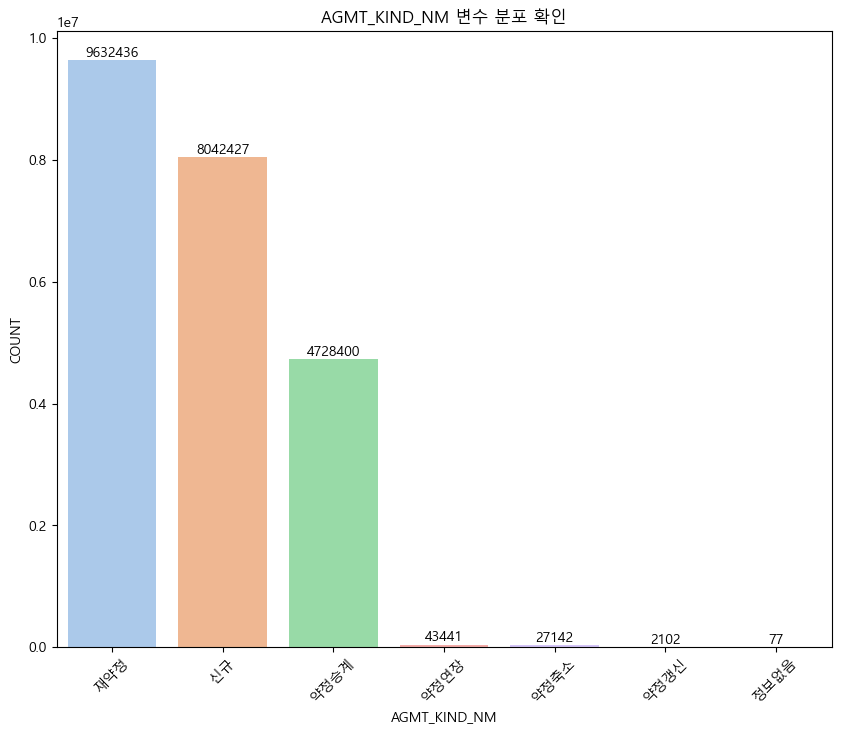

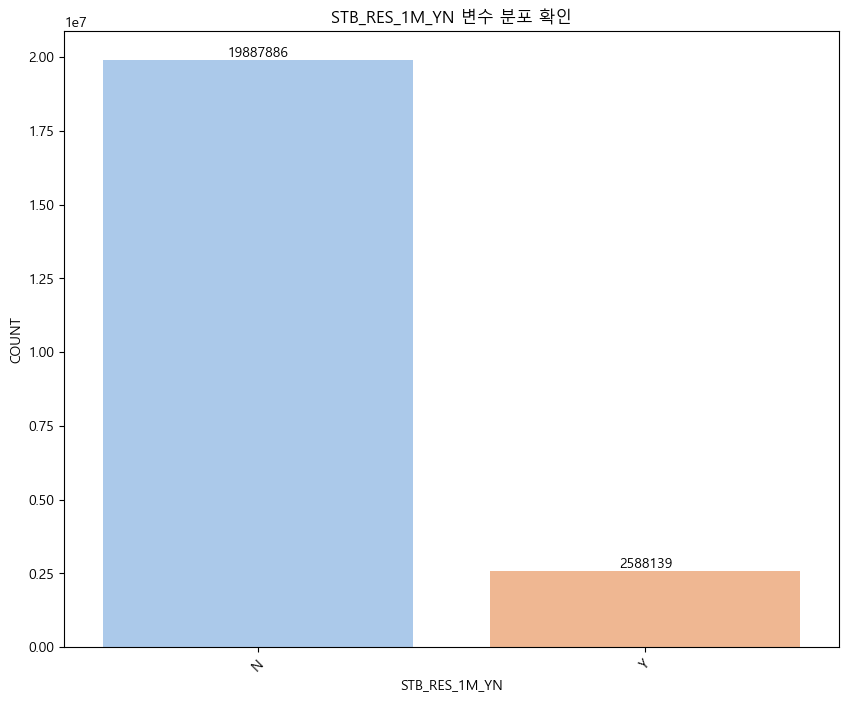

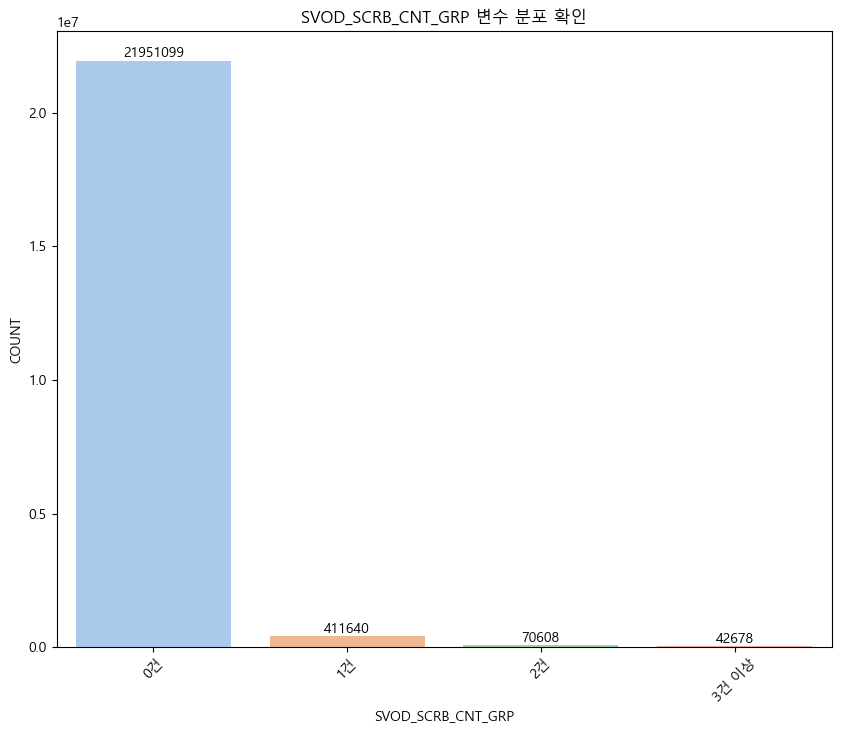

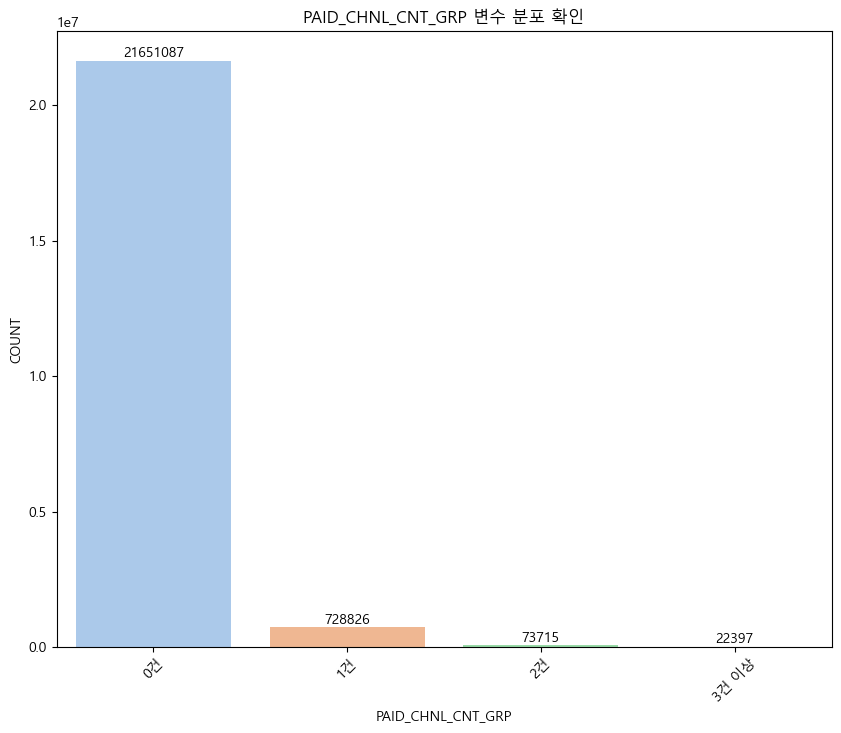

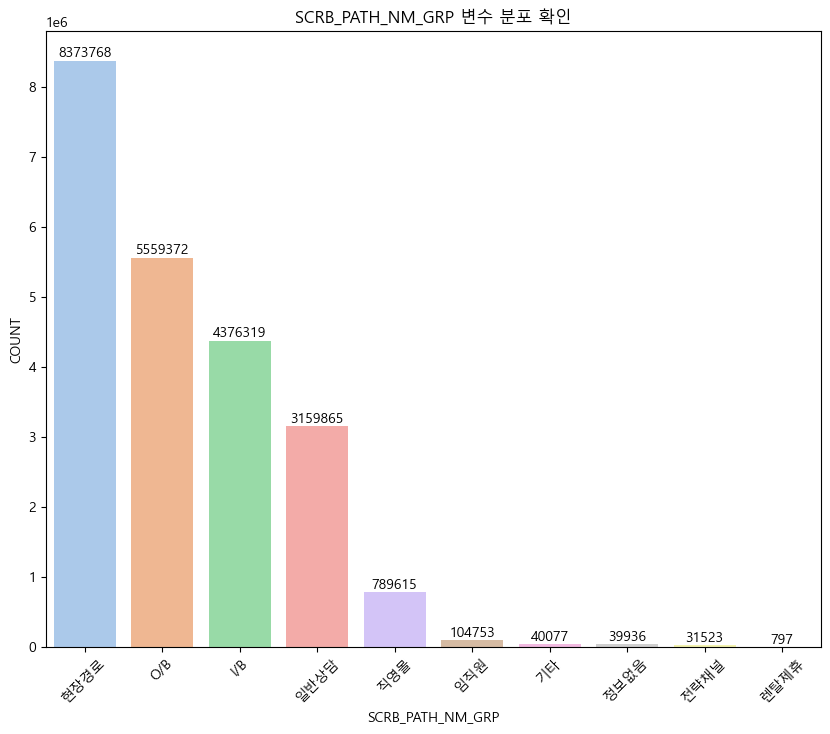

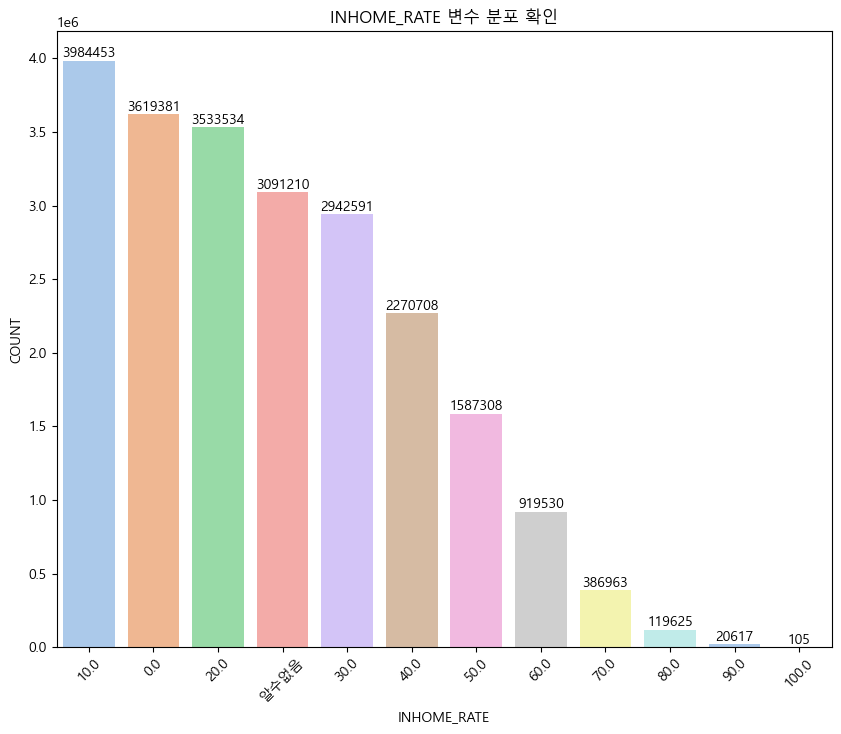

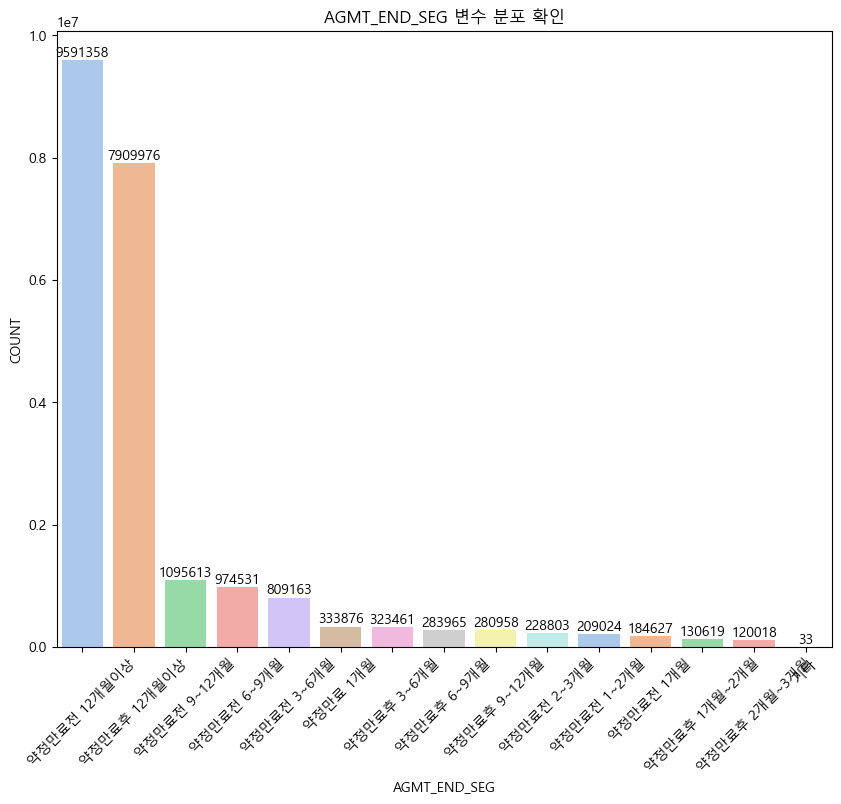

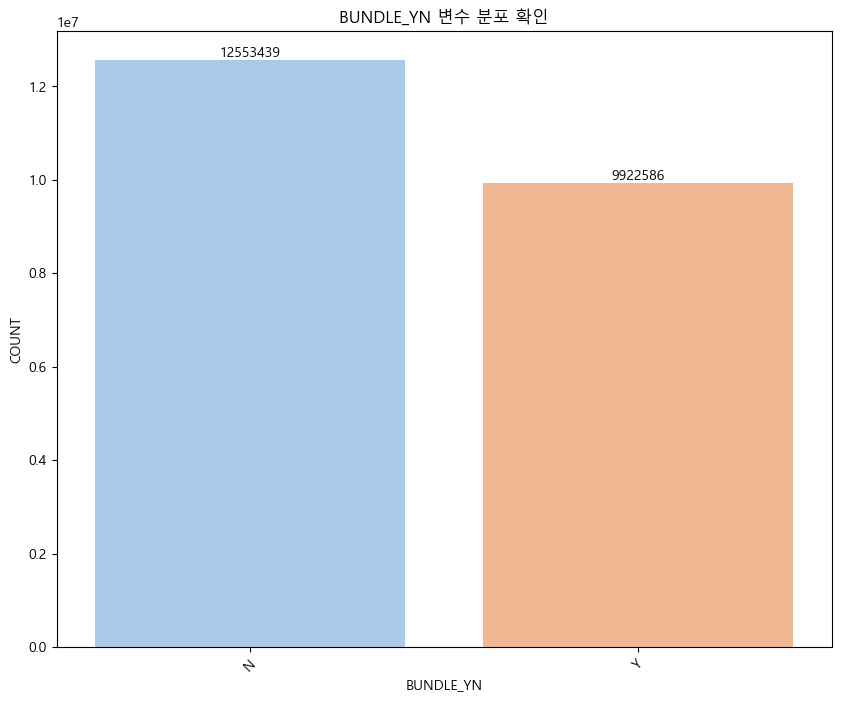

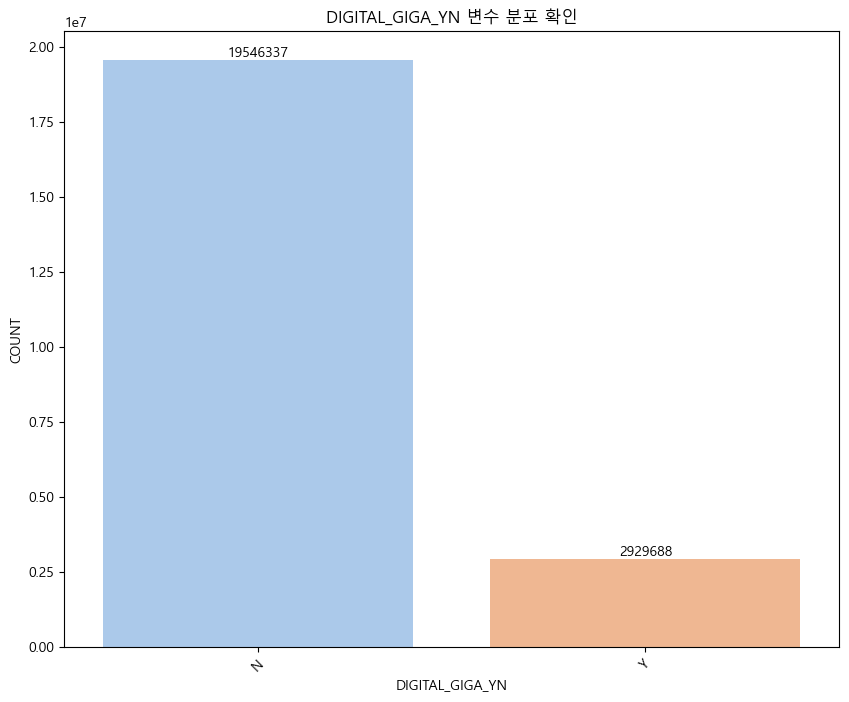

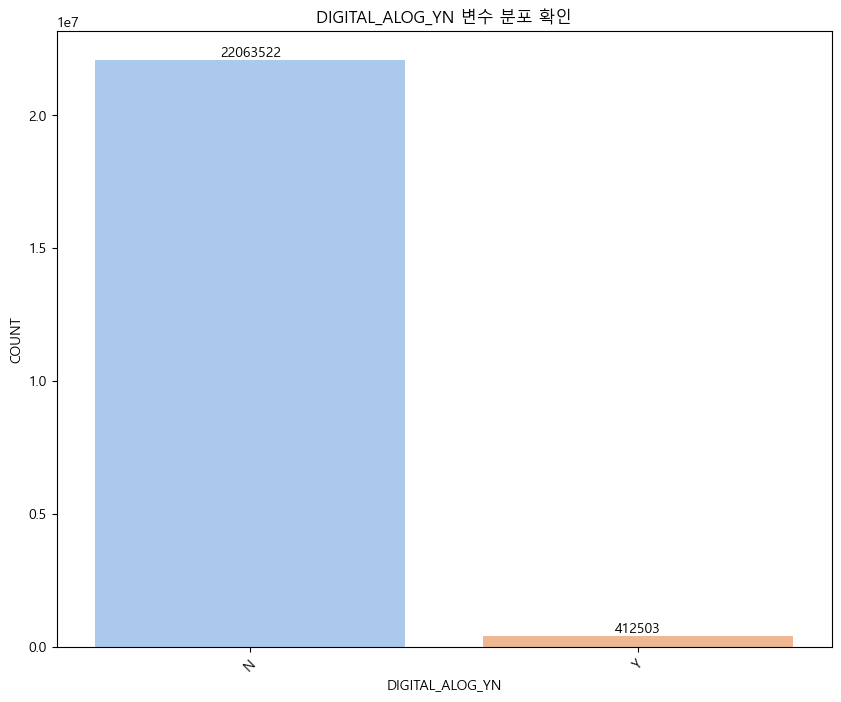

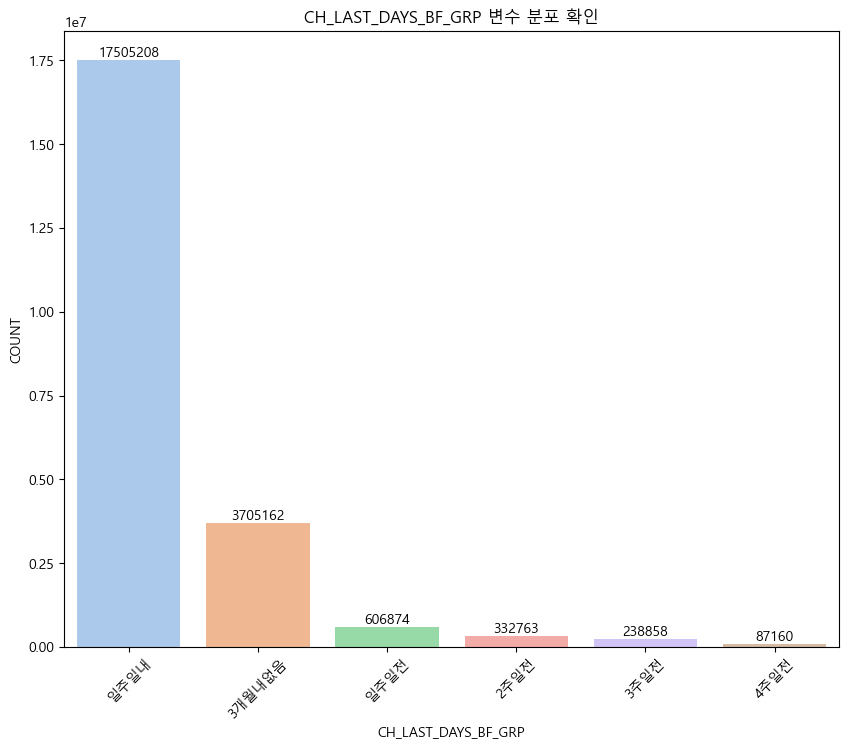

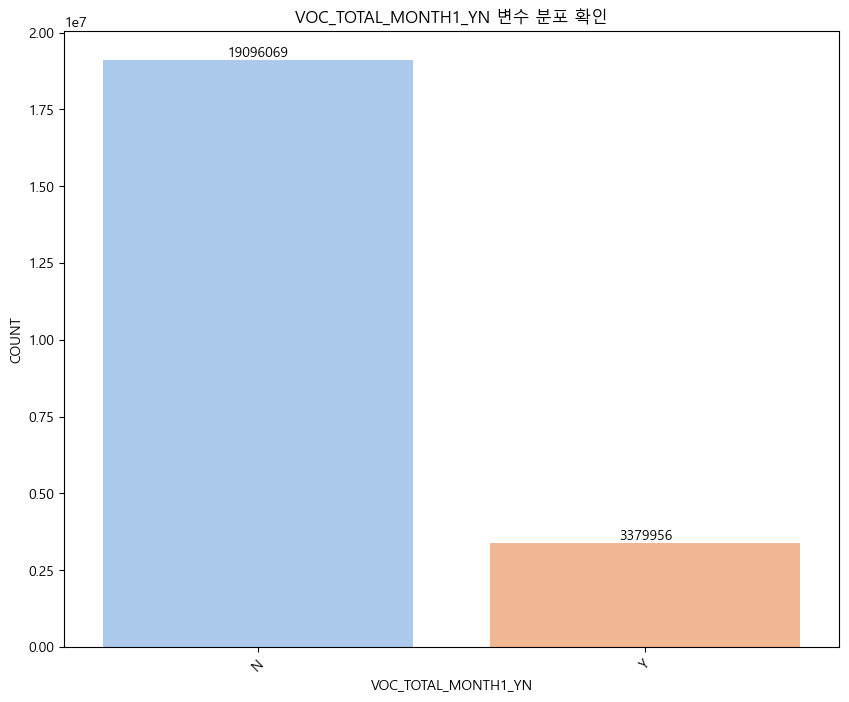

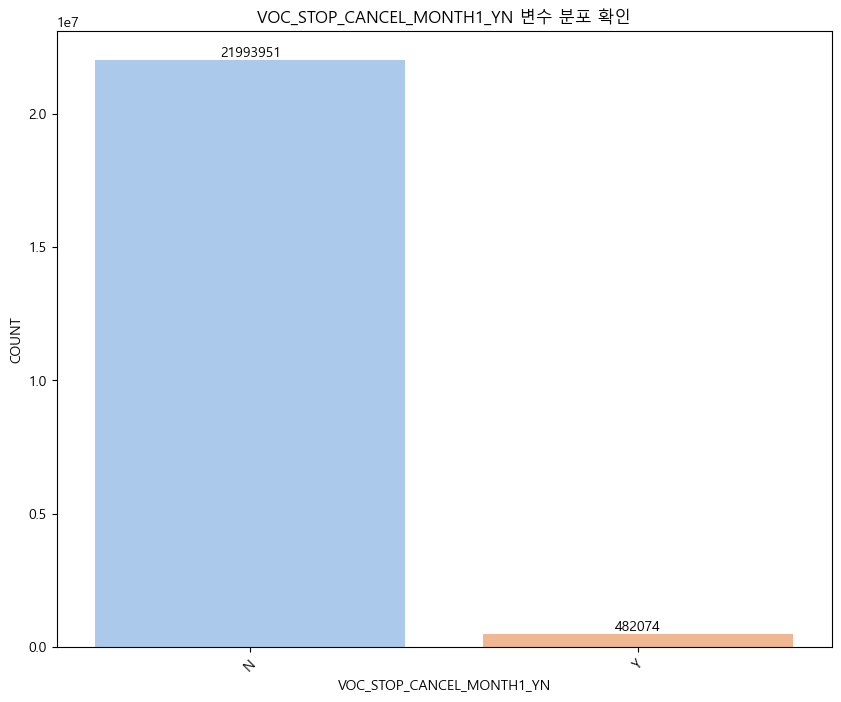

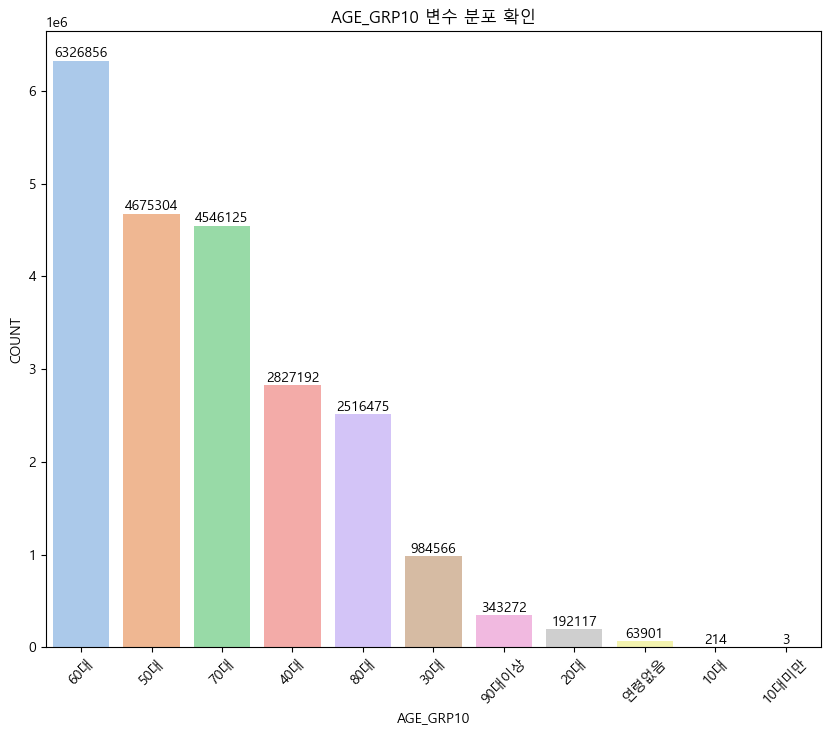

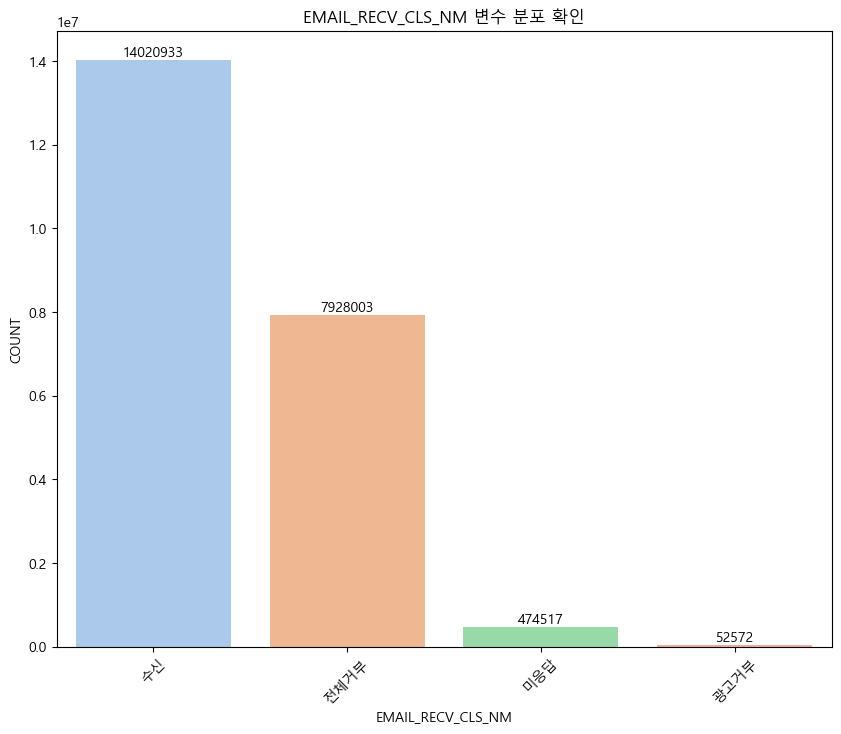

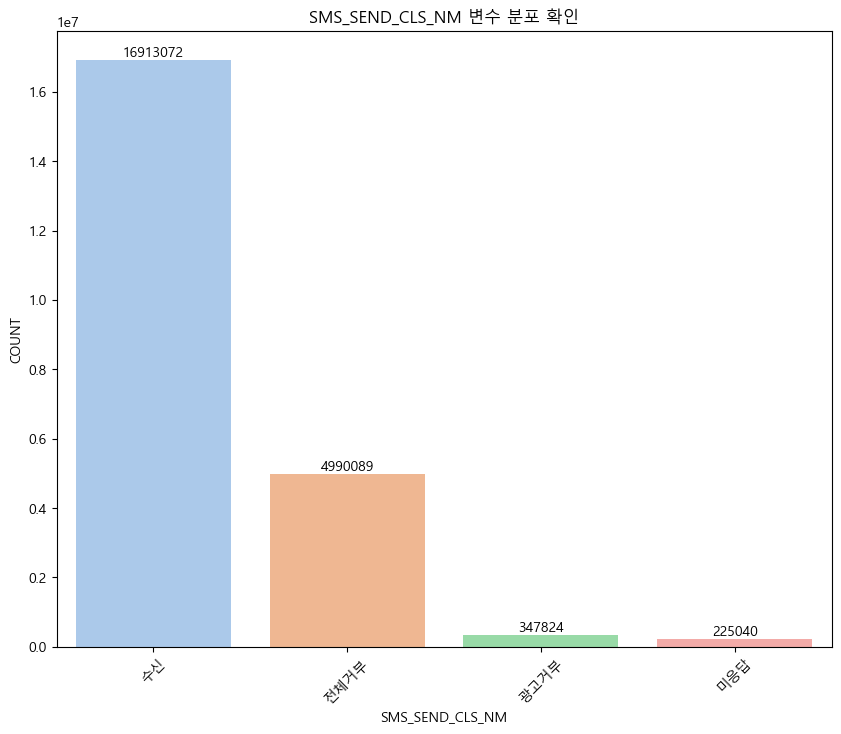

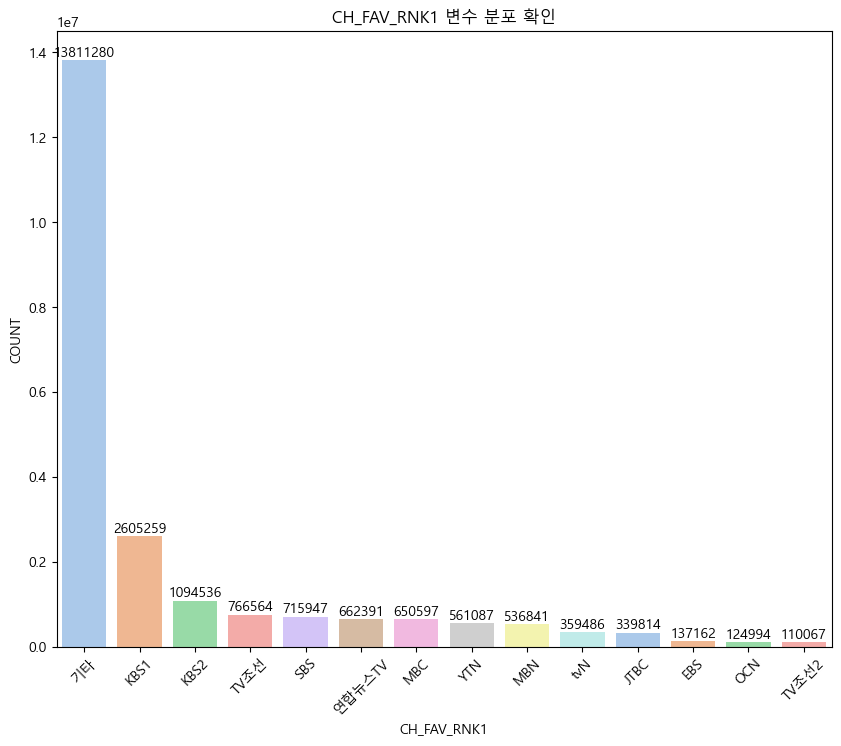

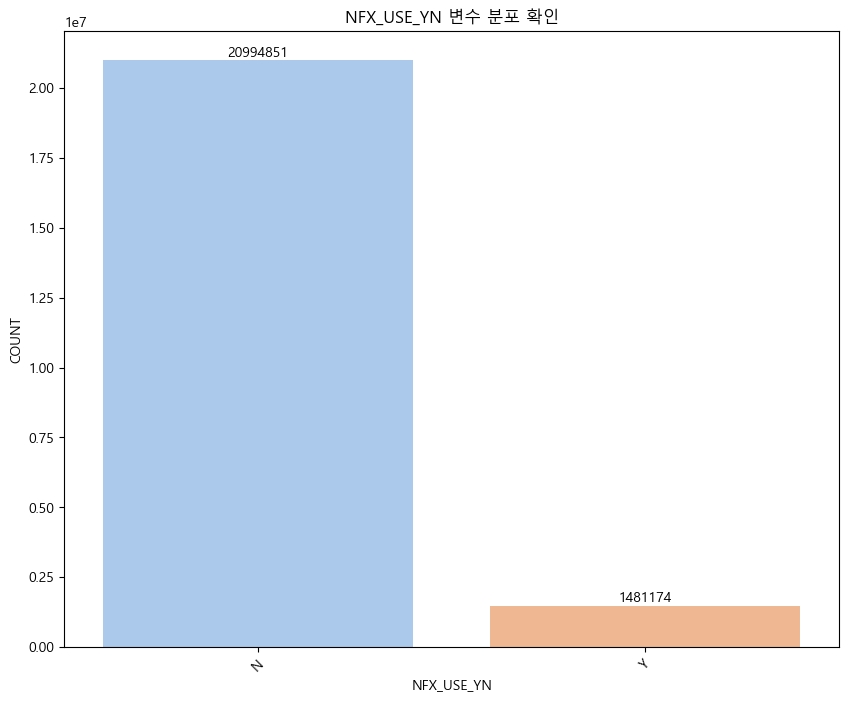

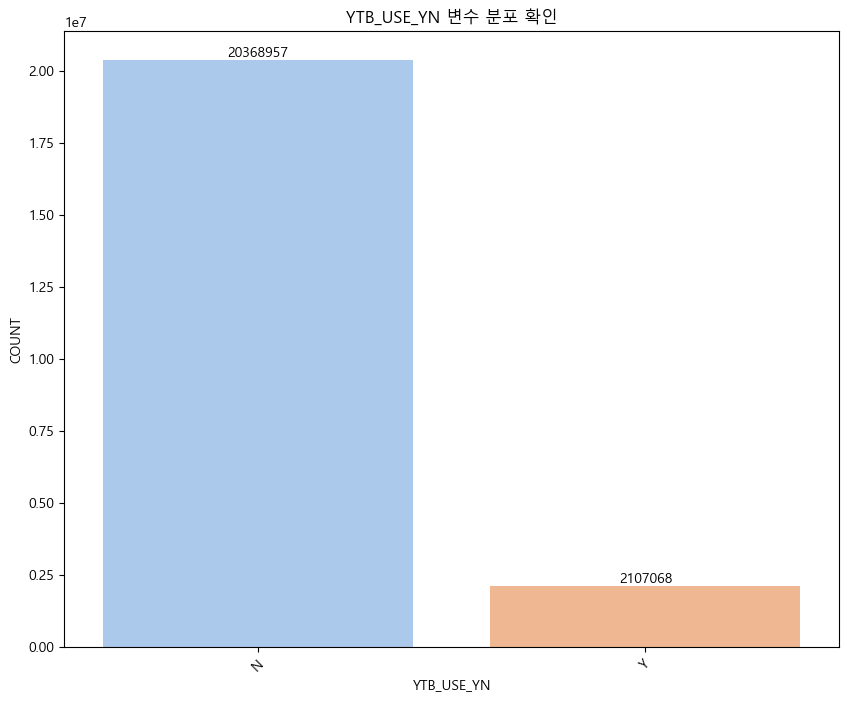

In [13]:
# 범주형 변수
categorical_columns = df.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'AGMT_END_YMD', 'churn']

for col in categorical_columns:
  if col not in exclude_cols:
    plt.figure(figsize=(10,8))
    ax = sns.countplot(data=df, x=col, palette='pastel', order = df[col].value_counts().index)

    for p in ax.patches:
      height = p.get_height()
      ax.annotate(f"{int(height)}", xy=(p.get_x() + p.get_width() / 2., height),
                  xytext=(0, 5),
                  textcoords="offset points", ha = 'center', va = 'center', fontsize=10, color='black')

    # 그래프 제목, x,y 라벨
    plt.title(f"{col} 변수 분포 확인")
    plt.xlabel(col)
    plt.ylabel("COUNT")
    plt.xticks(rotation=45)
    plt.show()

▶️ 36개월 이상 사용하는 사람들이 가장 많음. 충성 고객을 많이 유지 중. <br>
▶️ UHD보다는 HD를 이용하는 사람이 많음.<br>
▶️ 중간 요금인 베이직을 제일 많이 이용. (이코노미 < 베이직 < 프리미엄)<br>
▶️ 옛날 상품을 이용하는 사람은 현저히 적음.<br>
▶️ 재약정 유저 -> 신규 -> 약정 승계 순서임.<br>
▶️ 1달간 휴면 유저인 사람들의 수는 별로 없음.<br>
▶️ 월정액 가입 수, 채널 가입 수에서는 0건이 월등히 많음. 대부분의 사람들이 추가적인 구매를 하지 않고 그냥 사용하시는듯.<br>
▶️ 현장 경로(대리점)로 가입한 사람들이 제일 많음.<br>
▶️ 집돌이 지수에서는 10.0이 제일 많음. 알 수 없음은 결측치인가? 궁금함.<br>
▶️ 약정 만료 전 12개월 이상, 약정 만료 후 12개월 이상인 사람들이 많음.<br>
▶️ 번들을 사용하는 사람들은 반반<br>
▶️ 기가 인터넷을 사용하지 않은 사람들이 많음.<br>
▶️ 아날로그를 사용하지 않은 사람들이 대부분임.<br>
▶️ 거의 대부분 사람들이 일주일내 TV를 시청했음.<br>
▶️ 나이는 60대가 제일 많이 분포. 연령없음은 유저가 처음부터 나이를 입력을 하지 않은건가? 의문이 듦. 10대 미만은 없애는게 좋겠음.<br>
▶️ 생각외로, 이메일 수신한 사람들도 많고, SMS 수신한 사람들도 많음. <br>
▶️ 넷플릭스와 유튜브를 사용하는 사람들이 생각외로 별로 없음. LGHV의 주 고객층의 연령이 높기 때문에 이런거라고 생각.

4. 범주형 변수와 churn 변수의 관계 확인

✅ 범주형 변수와 churn의 비율 시각화


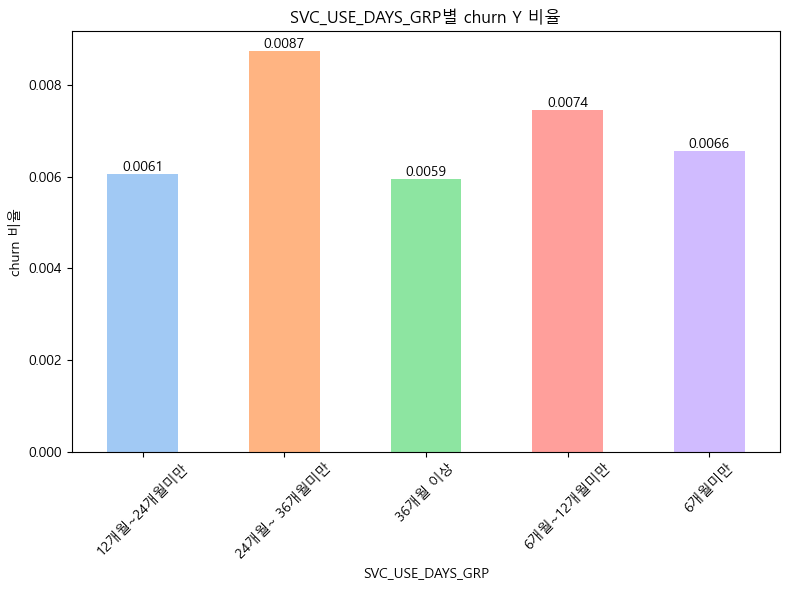

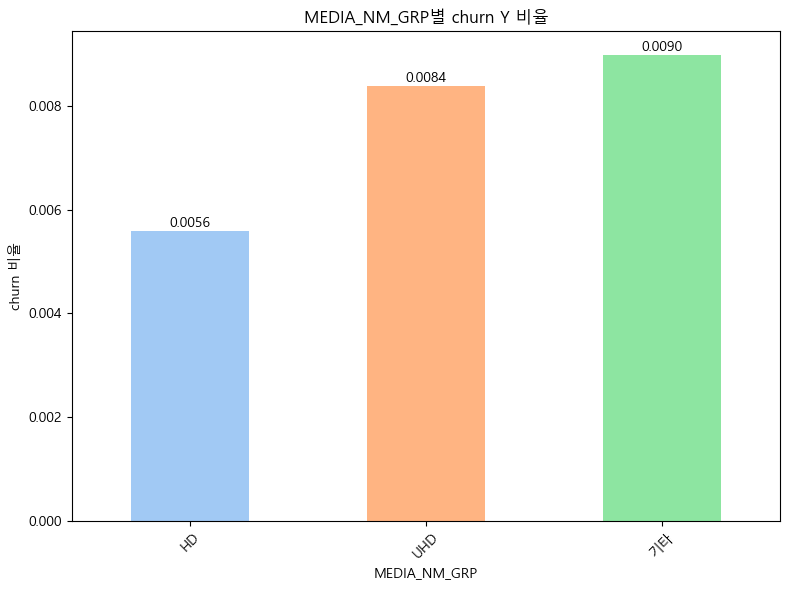

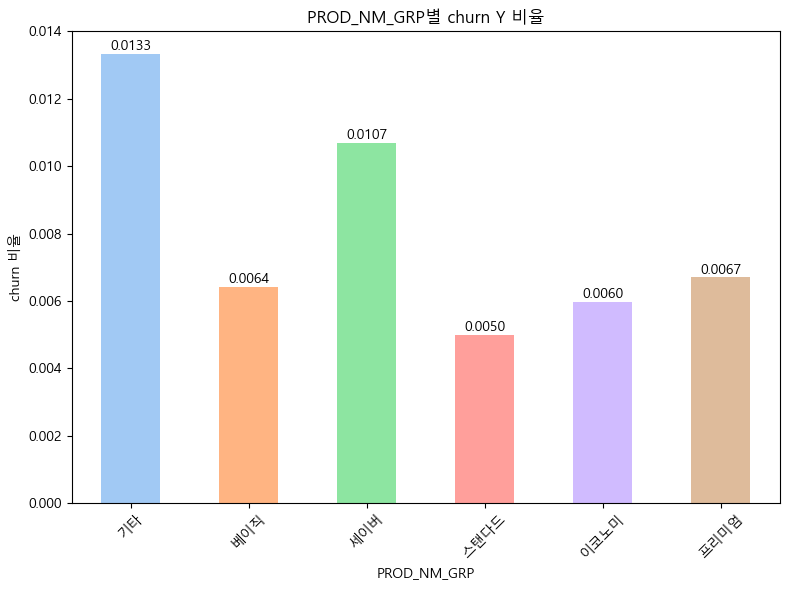

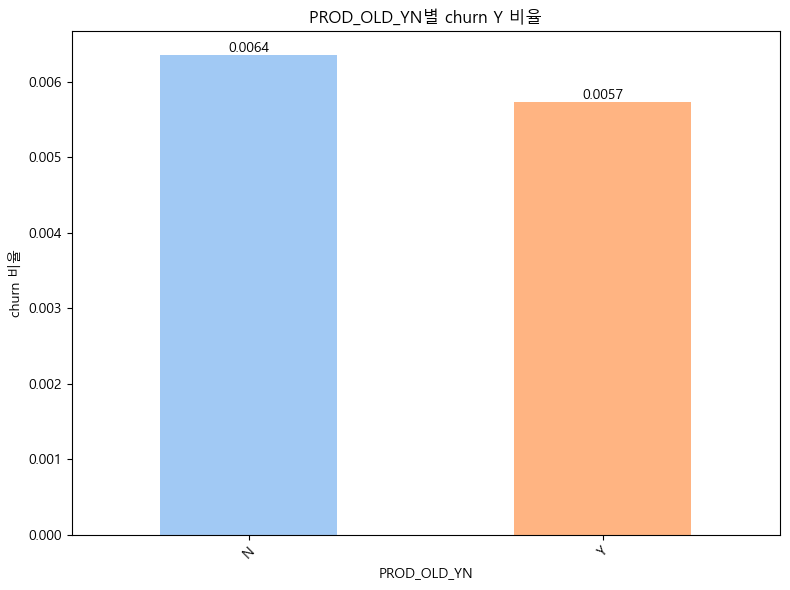

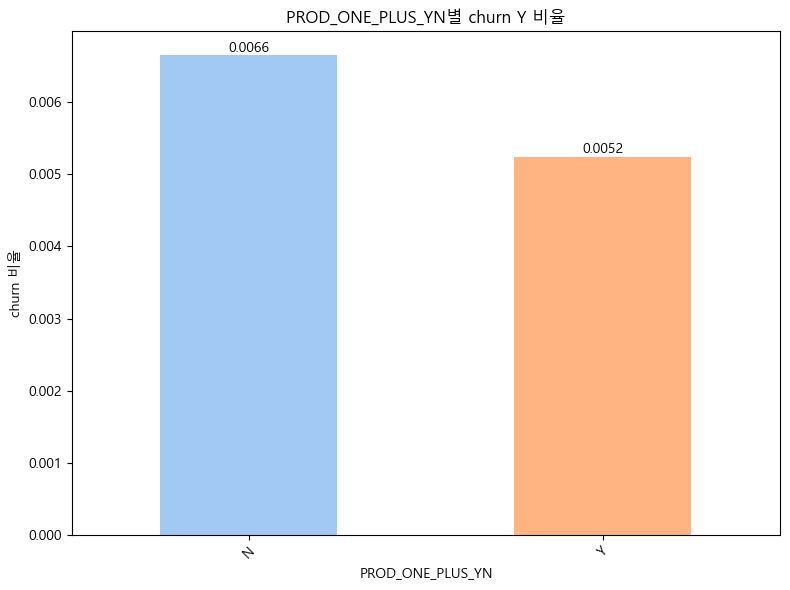

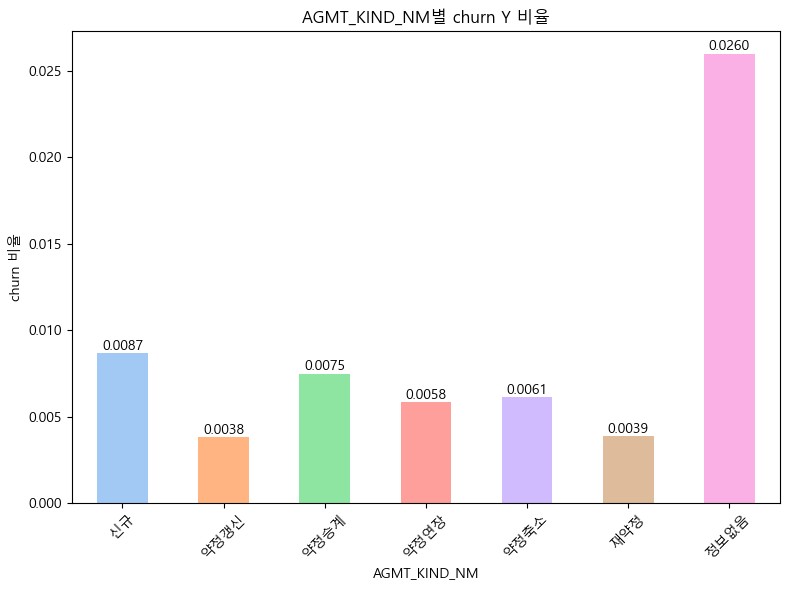

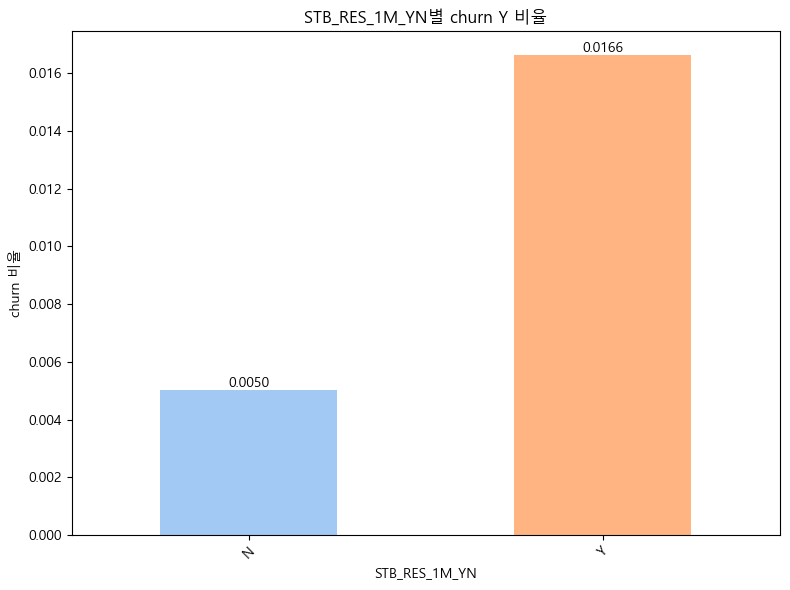

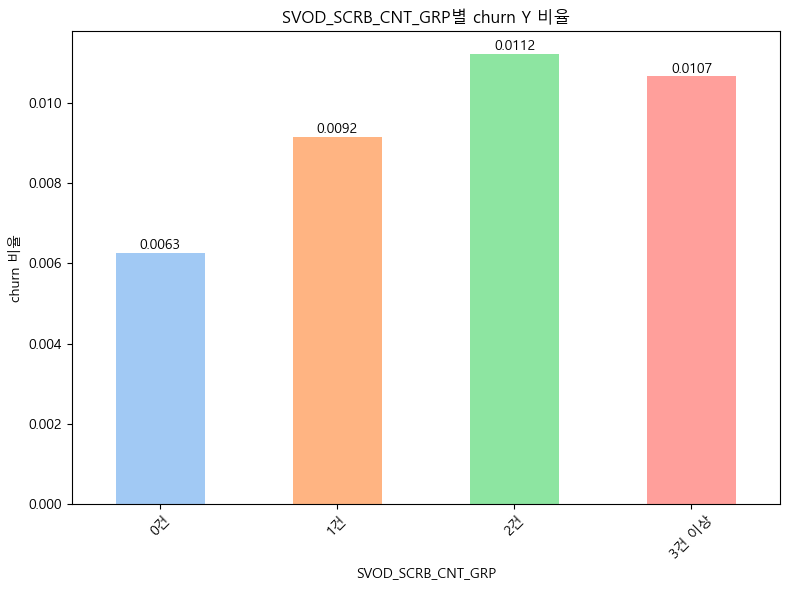

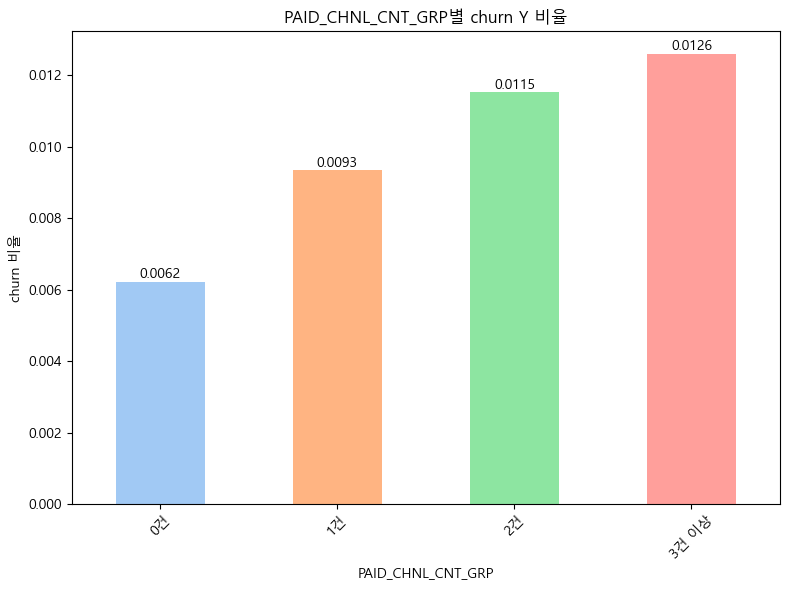

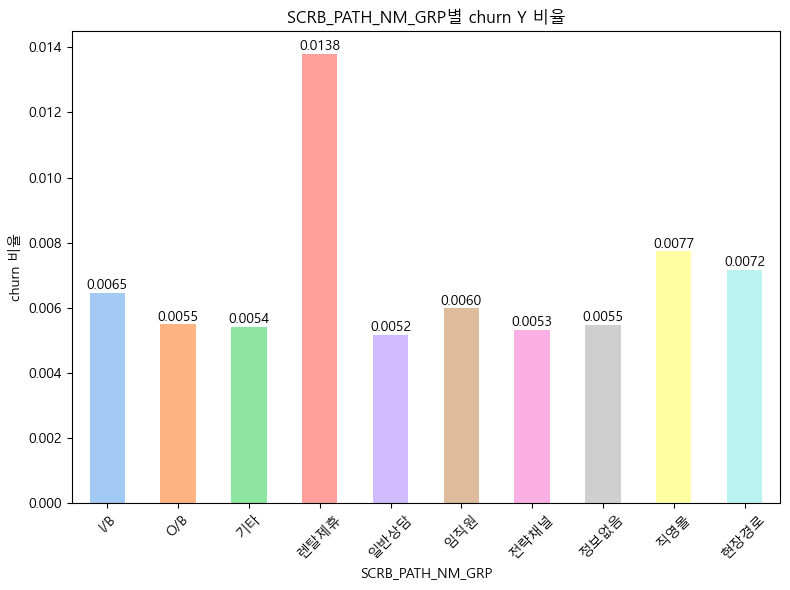

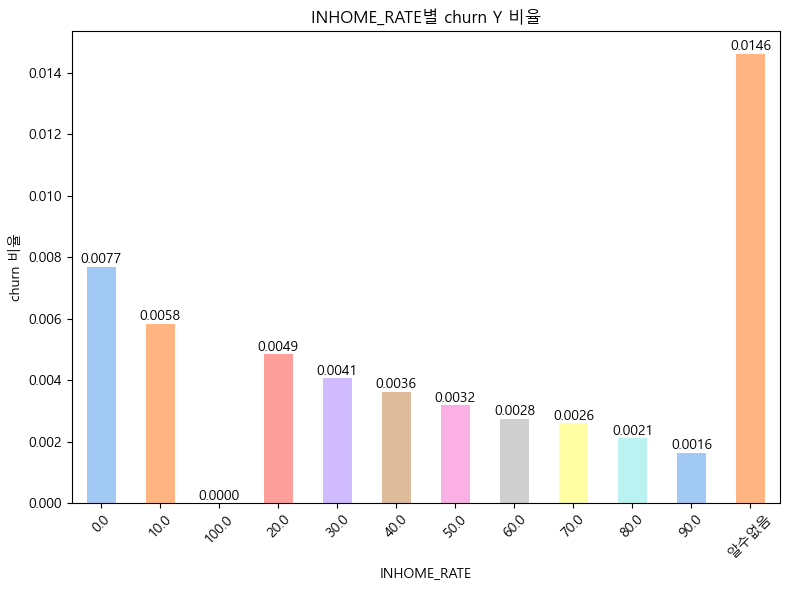

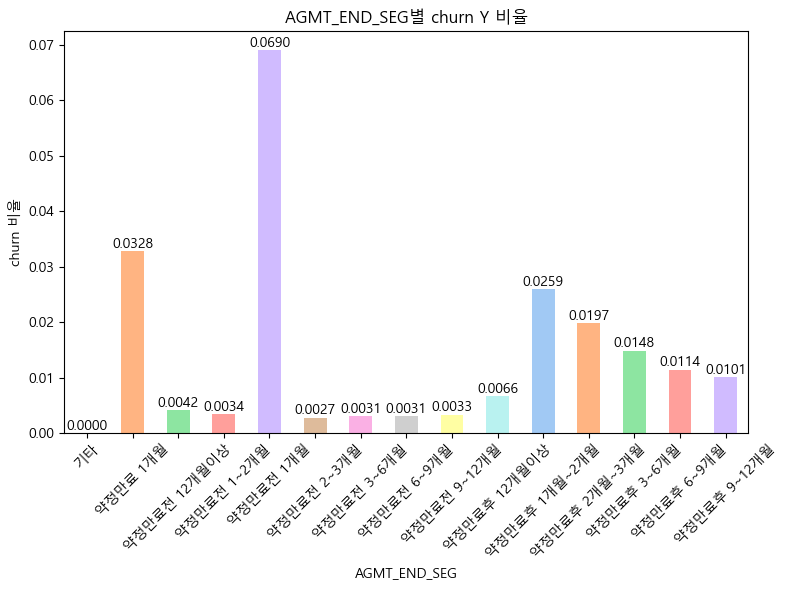

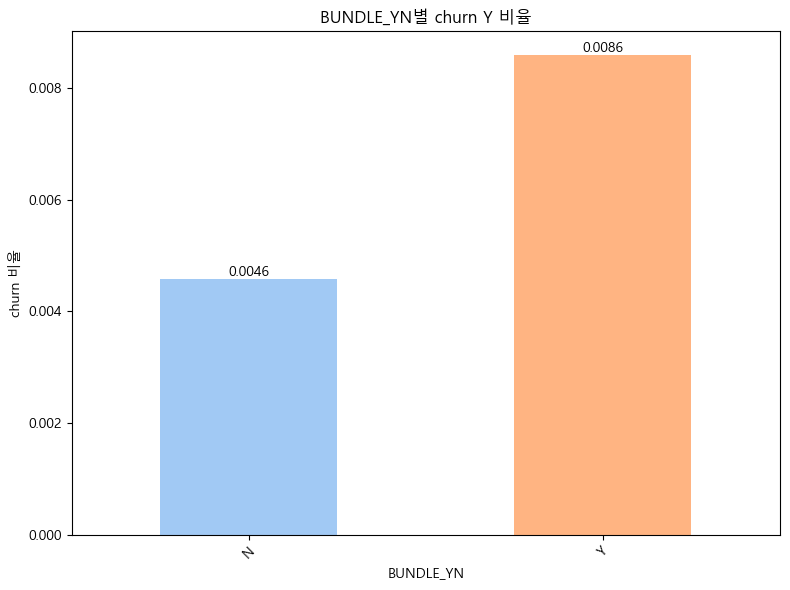

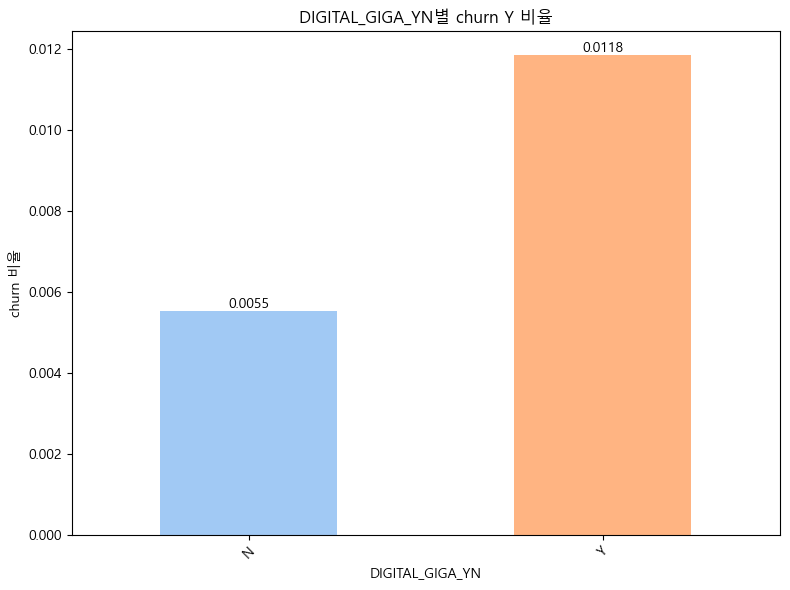

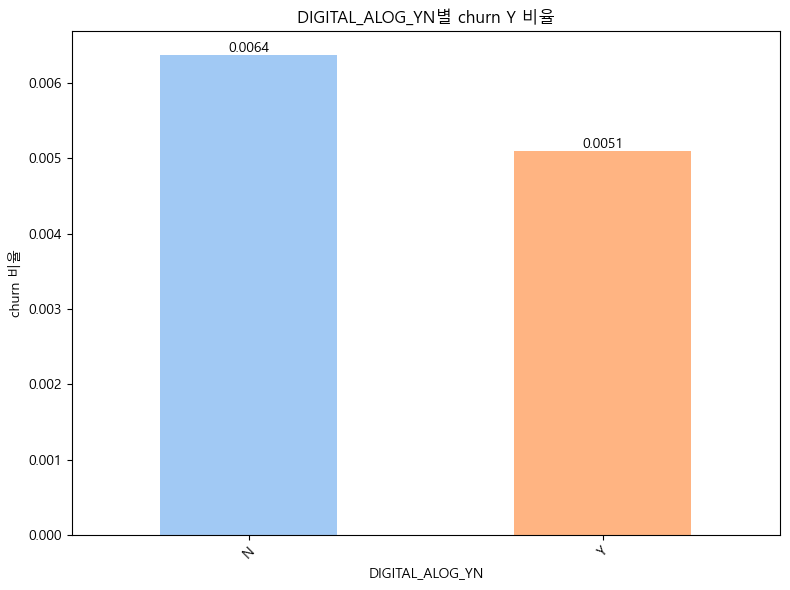

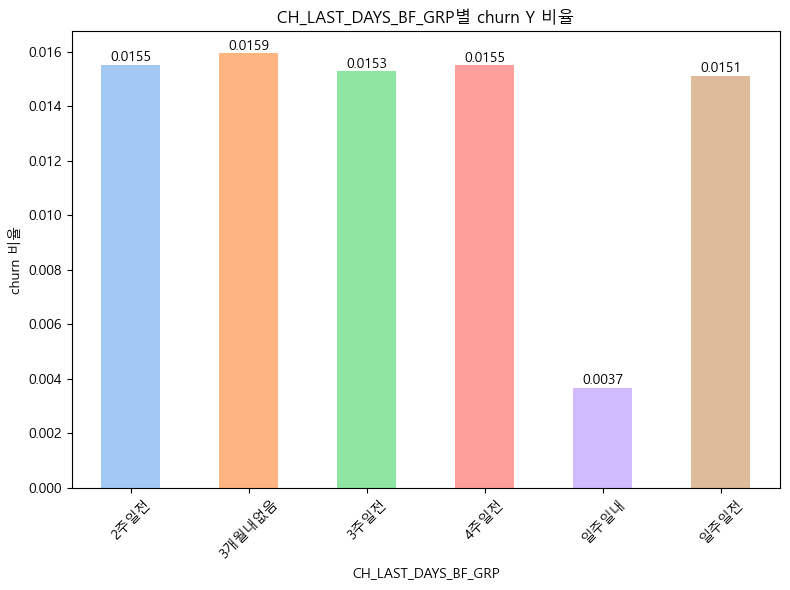

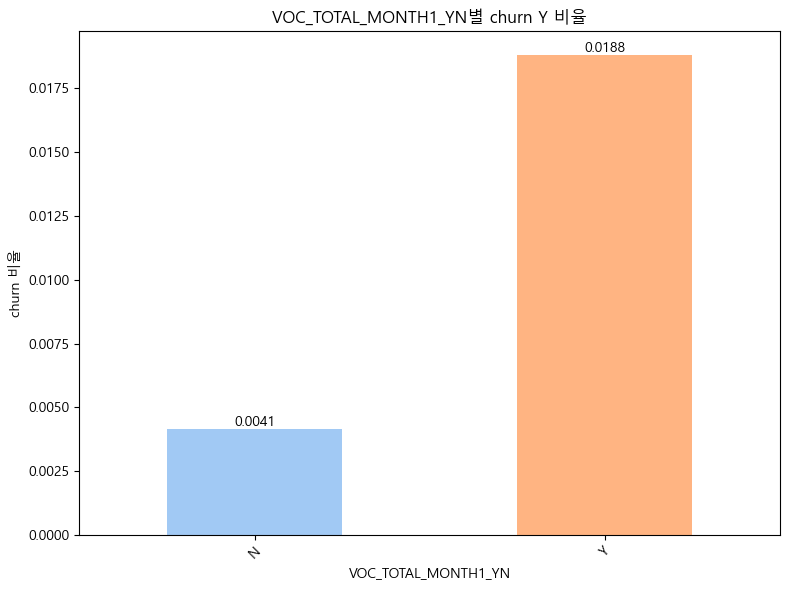

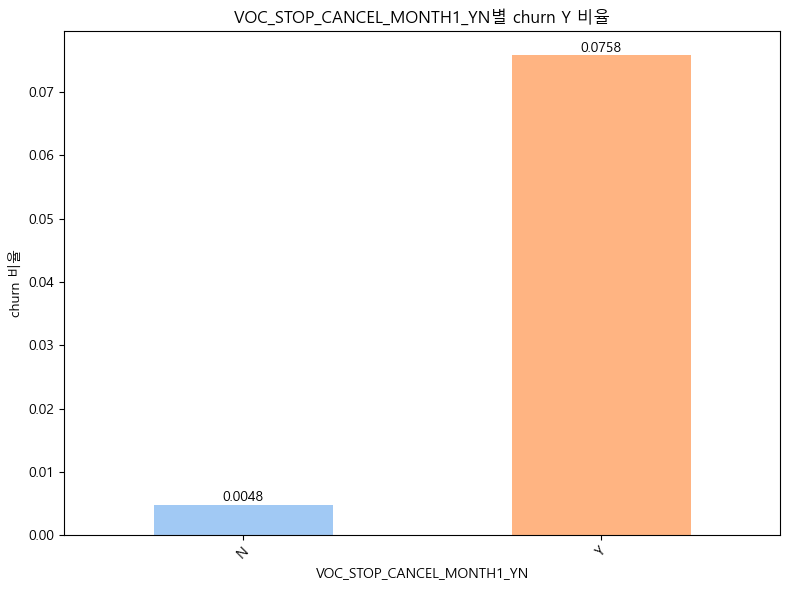

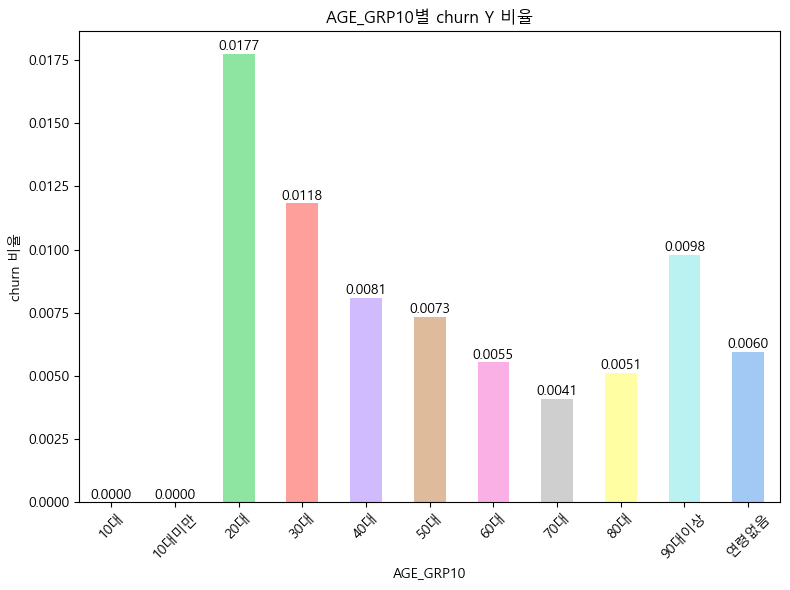

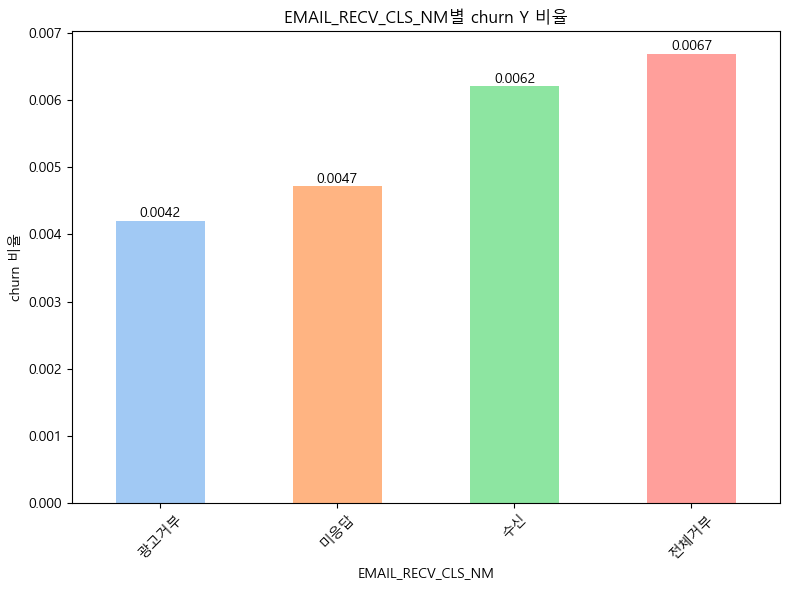

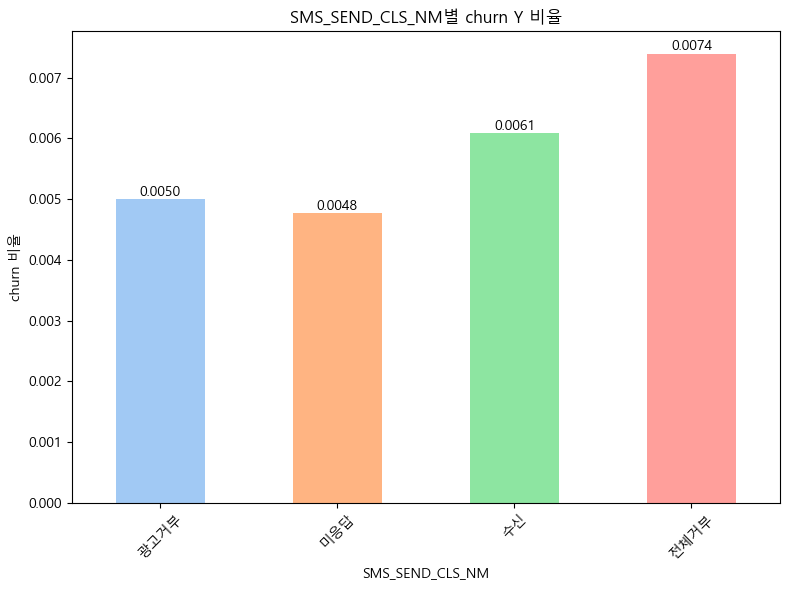

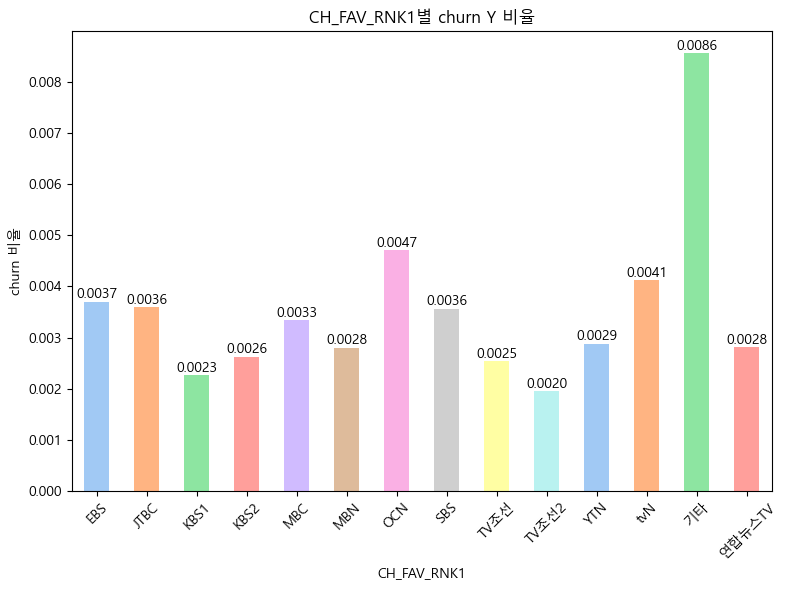

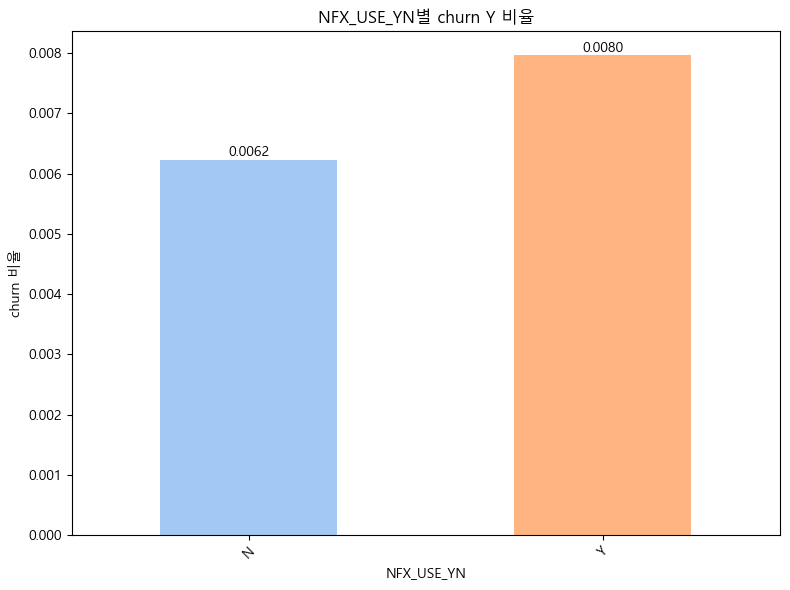

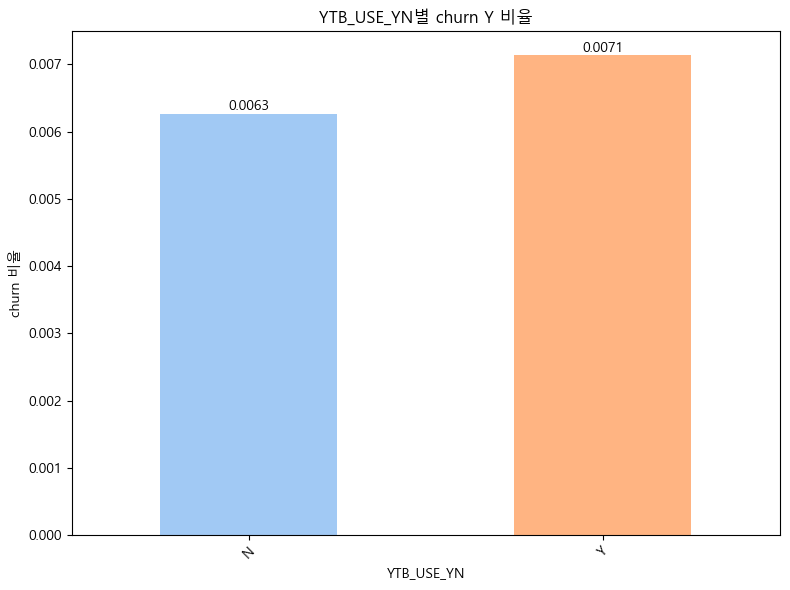

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'AGMT_END_YMD', 'churn']
print("✅ 범주형 변수와 churn의 비율 시각화")

for col in df.select_dtypes(include='object').columns:
    if col not in ['sha2_hash', 'AGMT_END_YMD', 'churn']:  # 제외할 컬럼
        try:
            
            group_churn = (df[df['churn'] == 'Y']
                           .groupby(col)
                           .size() / df.groupby(col).size())

            
            plt.figure(figsize=(8, 6))
            ax = group_churn.plot(kind='bar', color=sns.color_palette("pastel"), title=f'{col}별 churn Y 비율', ylabel='churn 비율')
            
            
            for p in ax.patches:
                height = p.get_height()
                if not pd.isna(height):
                    ax.annotate(f'{height:.4f}', 
                                xy=(p.get_x() + p.get_width() / 2., height),
                                xytext=(0, 5),
                                textcoords="offset points", ha='center', va='center', fontsize=10, color='black')


            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"오류 발생 - {col}: {e}")


▶️ 24개월 ~ 36개월미만에 가장 많이 분포되어있음. 대부분이 계약을 2년정도 하니, 계약이 끝나면 해지를 많이하기 때문에 해당 부분에 몰려있을거라고 생각됨. 그리고는 다 비슷비슷한 비율을 나타내고 있음. <br>
▶️ 상품을 기타를 사용할 때가 가장 많이 해지한다고함. HD, UHD 말고 존재하는것들이 UHD2, 헬로티비 pro등이 존재하는데 해당 서비스는 HD, UHD보다 고가의 상품임. 고가의 상품을 해지할 수록 해지율이 올라가는듯.<br>
▶️ 가격은 기타, 세이버에서 많이 분포함. 기타, 세이버를 이용하는 사용자의 수가 적어서 그럴 수도 있음. 나머지 요금제들은 비슷비슷한 비율을 나타내고 있음.<br>
▶️ PROD_OLD_YN은 Y와 N의 해지율이 비슷함. 모델링에 큰 역할을 주진 않을듯함.<br>
▶️ PROD_ONE_PLUS_YN의 Y와 N도 비슷함.<br>
▶️ AGMT_KIND_NM에서는 정보없음에서 제일 많이 보임. 그런데 정보없음이 77개 밖에 없기때문에 그럴수도 있음.<br>
▶️ 최근 한 달간 휴면 유저인 사람들 중에서는 Y가 많음. 최근에 휴면이었다면 Y가 많은듯함.<br>
▶️ 월정액과 채널 가입은 1건 이상일수록 해지를 더 많이함.<br>
▶️ 특히 렌탈제휴에서 많이 해지를 하는 것으로 보임. 렌탈제휴가 797명 밖에 없기도 하고.. 많이 나올 수 밖에 없는거 같기도 함.<br>
▶️ 집돌이지수는 0~10일수록 해지를 더 하는 것으로 보임. TV를 많이 보는 사람들인 100~90은 매우 적음. 알수없음은 추후에 알아보기로 해야될 것 같음.<br>
▶️ 약정만료 1개월(약정 만료 달)과 약정만료전 1~2개월에서 많은 사람들이 해지를 하는 경향이 보임. 이는 계약이 끝날 때쯤, LGHV에서 계약이 끝나간다고 고지를 해주는 것으로 예상됨. <br>
▶️ 번들을 사용하는 사람들이 해지를 더 많이 하는 것으로 보임.<br>
▶️ 기가 인터넷을 사용하는 살마들이 해지를 더 많이 하는 것으로 보임.<br>
▶️ 아날로그는 비슷비슷한 비율임.<br>
▶️ 최근 접속일 컬럼은 일주일내에 TV를 시청한 기록이 있는 사람들(자주 이용하는 사람들을 의미)은 해지를 잘 하지 않고, 일주일 이후부터 접속을 하지 않은 사람들은 해지율이 쭉 올라감.<br>
▶️ 전화상담을 한 사람들이 해지를 많이 함.<br>
▶️ 해지 상담을 한 사람들이 해지를 많이 함.<br>
▶️ 2,3,40대 순으로 해지를 많이 함.<br>
▶️ 이메일과 SMS는 전체거부일 때 해지를 많이하고, 다 비슷비슷함. 수신을 한다고 해지율이 낮아지는건 아님.<br>
▶️ 넷플릭스, 유튜브 사용자는 비슷비슷함.<br>

5. 범주형 변수와 churn과의 카이제곱 검정 시행

In [29]:
from scipy.stats import chi2_contingency
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

categorical_columns = df.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'AGMT_END_YMD', 'churn']

print("✅ 범주형 변수와 churn 간의 카이제곱 검정 결과:")

for col in categorical_columns:
    if col not in exclude_cols:
        try:
            # 교차표 생성
            contingency_table = pd.crosstab(df[col], df['churn'])

            # 카이제곱 검정!
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            print(f"\n🔍 {col} 변수와 churn:")
            print(f"카이제곱 통계량: {chi2:.2f}")
            print(f"p-value: {p:.8f}")
            print(f"자유도: {dof}")
            print(f"기대 빈도:\n{expected}")

            if p < 0.05:
                print("➡️ 유의미한 관계 (p < 0.05)")
            else:
                print("➡️ 유의미하지 않은 관계 (p >= 0.05)")
        except Exception as e:
            print(f"오류 발생 - {col}: {e}")


✅ 범주형 변수와 churn 간의 카이제곱 검정 결과:

🔍 SVC_USE_DAYS_GRP 변수와 churn:
카이제곱 통계량: 2719.69
p-value: 0.00000000
자유도: 4
기대 빈도:
[[2.28767396e+06 1.46080429e+04]
 [2.25412220e+06 1.43937967e+04]
 [1.53572287e+07 9.80642614e+04]
 [1.17440181e+06 7.49919452e+03]
 [1.25998730e+06 8.04570444e+03]]
➡️ 유의미한 관계 (p < 0.05)

🔍 MEDIA_NM_GRP 변수와 churn:
카이제곱 통계량: 5482.80
p-value: 0.00000000
자유도: 2
기대 빈도:
[[1.63466398e+07 1.04382189e+05]
 [5.91485742e+06 3.77695829e+04]
 [7.19167723e+04 4.59227721e+02]]
➡️ 유의미한 관계 (p < 0.05)

🔍 PROD_NM_GRP 변수와 churn:
카이제곱 통계량: 298.38
p-value: 0.00000000
자유도: 5
기대 빈도:
[[7.45241229e+01 4.75877073e-01]
 [1.14839825e+07 7.33314768e+04]
 [1.67132766e+03 1.06723365e+01]
 [1.87860409e+05 1.19959093e+03]
 [6.29152519e+06 4.01748115e+04]
 [4.36830003e+06 2.78939725e+04]]
➡️ 유의미한 관계 (p < 0.05)

🔍 PROD_OLD_YN 변수와 churn:
카이제곱 통계량: 11.11
p-value: 0.00085895
자유도: 1
기대 빈도:
[[2.21508985e+07 1.41445539e+05]
 [1.82515539e+05 1.16546102e+03]]
➡️ 유의미한 관계 (p < 0.05)

🔍 PROD_ONE_PLUS_YN 변수와 churn:
카이제

카이제곱 검정에서는 모든 범주형 컬럼이 churn과의 유의미한 관계를 가진다고 보고 있음.

6. 연속형 변수 확인

In [31]:
# 연속형 변수들 확인
numerical_cols = df.select_dtypes(include=['float64','int64']).columns

print("✅ 연속형 변수 목록 :")
print(numerical_cols)

✅ 연속형 변수 목록 :
Index(['TOTAL_USED_DAYS', 'TV_SCRB', 'ANALOG_SCRB', 'DIGITAL_SCRB',
       'TOTAL_INTERNET_SCRB', 'GIGA_INTERNET_SCRB', 'TV_I_CNT',
       'CH_HH_AVG_MONTH1', 'CH_25_RATIO_MONTH1', 'CH_25_RATIO_MEAN_3MM',
       'KIDS_USE_PV_MONTH1', 'p_mt'],
      dtype='object')


In [33]:
# 통계 확인
df[numerical_cols].describe()

,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,TV_I_CNT,CH_HH_AVG_MONTH1,CH_25_RATIO_MONTH1,CH_25_RATIO_MEAN_3MM,KIDS_USE_PV_MONTH1,p_mt
count,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00,22476025.00
mean,2760.33,1.78,0.02,1.76,0.50,0.13,2.28,4.55,2.41,2.41,0.40,6.99
std,1219.27,2.81,0.18,2.80,1.03,0.36,3.43,4.11,5.29,5.29,4.45,3.16
min,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00
25%,2095.00,1.00,0.00,1.00,0.00,0.00,1.00,1.16,0.00,0.00,0.00,4.00
50%,2920.00,2.00,0.00,1.00,0.00,0.00,2.00,3.62,0.83,0.83,0.00,7.00
75%,3648.00,2.00,0.00,2.00,1.00,0.00,3.00,7.03,2.89,2.89,0.00,10.00
max,45289.00,235.00,29.00,235.00,102.00,21.00,275.00,35.39,128.87,100.00,4621.00,12.00


✳️ TOTAL_USED_DAYS:
  - 평균은 2760.33, 중앙값이 2920.00으로 비교적 대칭적인 분포를 가질 가능성이 높음
  - 표준편차가 1219.27로 좀 크므로 평균에서 넓게 펴져있을 것 같음.
  - 최소값 0과 최대값 45289 사이의 범위가 매우 크므로 이상치를 포함하고 있을 가능성이 있음!
---
✳️ TV_SCRB: (DIGITAL_SCRB도 유사)
  - 평균은 1.78, 중앙값은 2.00, 상위 25퍼도 2.00이므로 모든 값이 1~2로 몰려있음.
  - 평균이 1.78인데 표준편차가 2.81로 평균보다 더 크기 때문에, 데이터에 큰 값이 존재하여서 평균을 끌어올렸을 가능성이 큼.
  - 최소값이 1, 최대값이 235이므로 사이의 범위가 매우 크기 때문에 이상치를 포함하고 있을 가능성이 있음!
---
✳️ ANALOG_SCRB:
  - 평균이 0.02, 중앙값도 0, 상위 25퍼도 0이므로 거의 모든 데이터가 0에 분포되어있으므로 편향된 분포를 보여줄 수 있음.
  - 최대값 29는 나머지 값들과의 차이가 크기 때문에 이상치일 가능성이 높음.
---
✳️ TOTAL_INTERNET_SCRB:
  - 25%, 중앙값까지 모두 0으로 데이터가 0에 매우 편향된 분포를 가질 가능성이 큼.
  - 상위 25%에서 1 이상의 값이 나타나며, 이 구간부터 값이 점차 증가하는 것을 의미;.
  - 최대값이 102.00, 상위 25%의 값 1.00과 값의 차이가 크므로 이상치일 가능성을 배제할 순 없음.
---
✳️ GIGA_INTERNET_SCRB:
  - 25%, 중앙값, 75% 값이 모두 0이라는 점에서 대부분의 데이터가 0에 몰려 있는 편향된 분포를 가질 가능성이 큼.
  - 최대값이 21.00, 상위 25%의 값 0.00과 값의 차이가 크므로 이상치일 가능성을 배제할 순 없음.
---
✳️ TV_I_CNT:
  - 25% 1, 중앙값 2, 75% 3 이므로 대부분의 값이 1~3에 매우 집중되어 있음을 알 수 있음.
  - 최대값 275와 상위 25%값인 3.0과의 차이가 크므로 이상치일 가능성을 배제할 순 없음.
  - 이상치가 평균의 값을 올려놓은 것일수도 있음.
---
✳️ CH_HH_AVG_MONTH1:
  - 25% 1.16, 중앙값 3.62, 75% 7.03으로 데이터가 주로 1~7사이에 집중되어 있음을 알 수 있음.
  - 최대값 35.39는 상위 25%값인 2.89와의 차이가 좀 크므로 이상치일 가능성을 배제할 순 없음.
  - 그래도 평균과 중앙값의 차이가 크지 않아서 비교적 대칭적인 분포일 가능성이 높음.
  - 하지만 일부 극단적인 이상치들이 분포의 꼬리를 늘릴 수 있음!
---
✳️ CH_25_RATIO_MONTH1, CH_25_RATIO_MEAN_3MM:
  - 두 컬럼은 유사한 것 같음. 다중공산성에 문제를 가질 수 있을 것 같음.
  - 25% ~ 75% 의 값을 보면 데이터는 주로 0 ~ 3 사이에 분포하는 것으로 파악됨.
  - 최대값은 상위 25%의 값인 2.89와 큰 차이를 보이므로 이상치로 간주될 가능성이 높음.
  - 중앙값과 평균의 차이가 크므로, 데이터는 오른쪽 꼬리가 긴 분포일 가능성이 있음.
---
✳️ KIDS_USE_PV_MONTH1
  - 25% ~ 75%의 값을 보면 데이터는 주로 0에 분포하는 것으로 파악됨. 
  - 최대값은 4621.00으로 이상치일 가능성이 매우 높음.

대부분 이상치라고 판단되는 컬럼들이 많음.

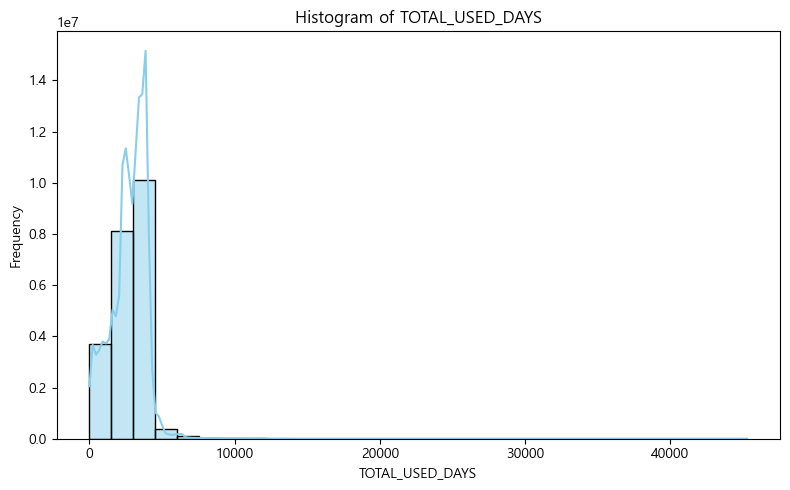

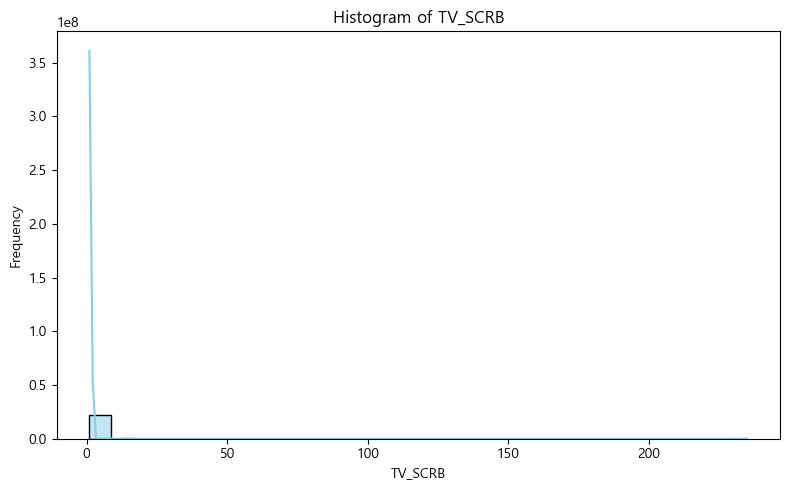

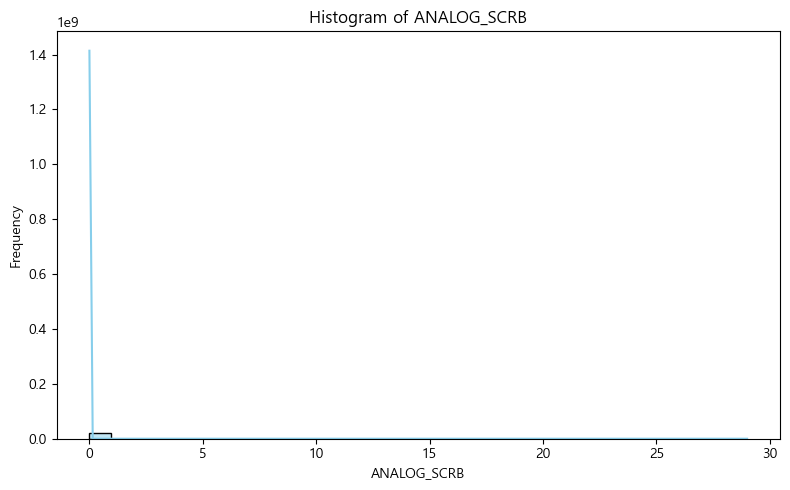

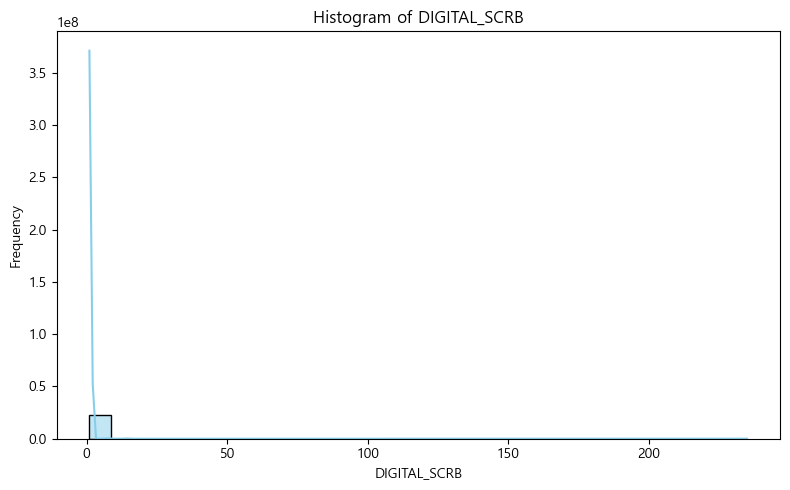

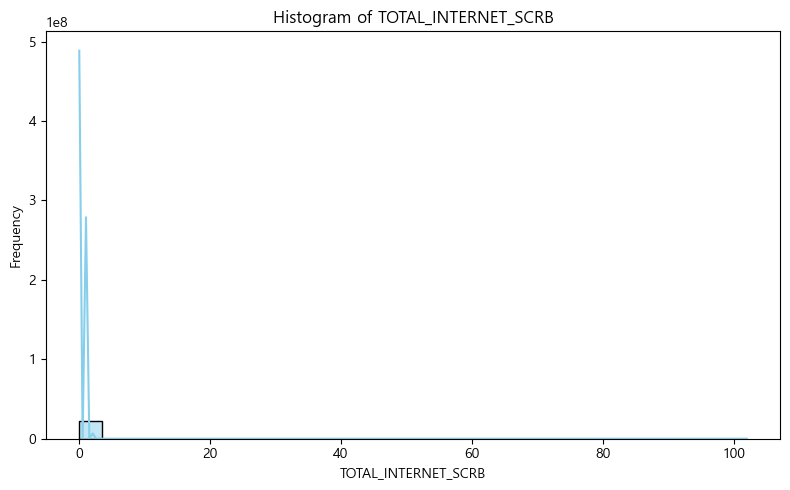

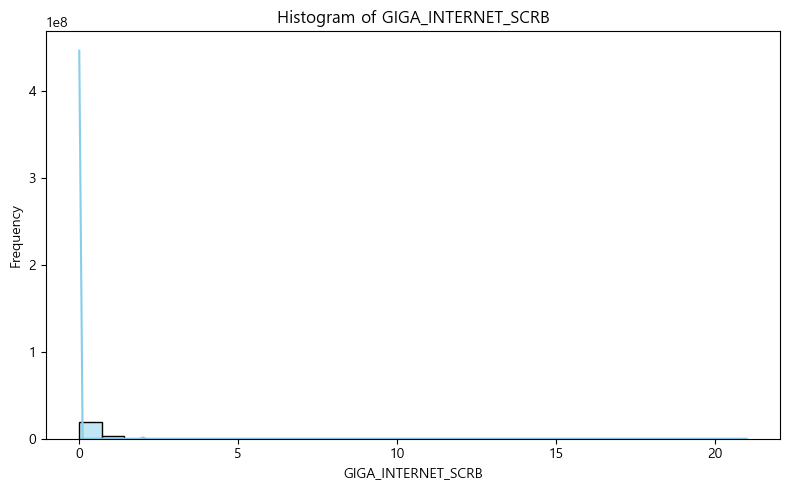

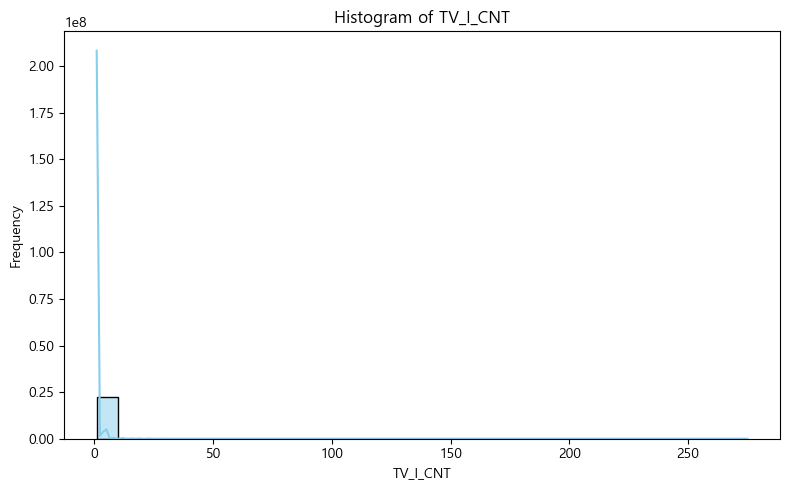

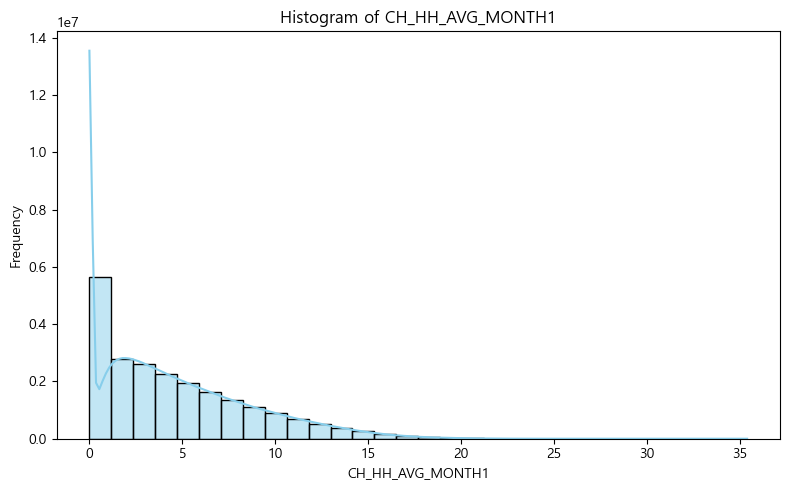

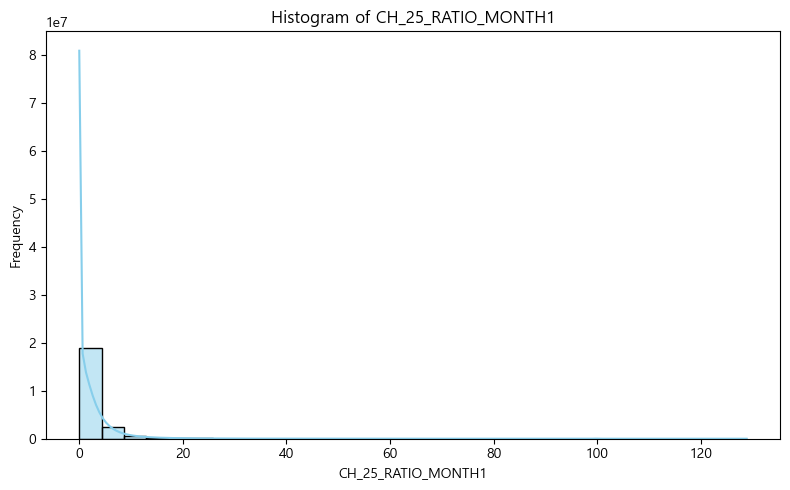

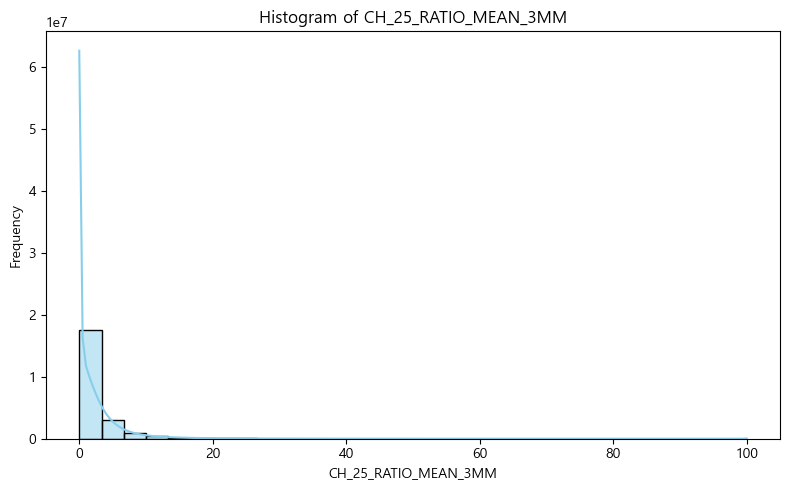

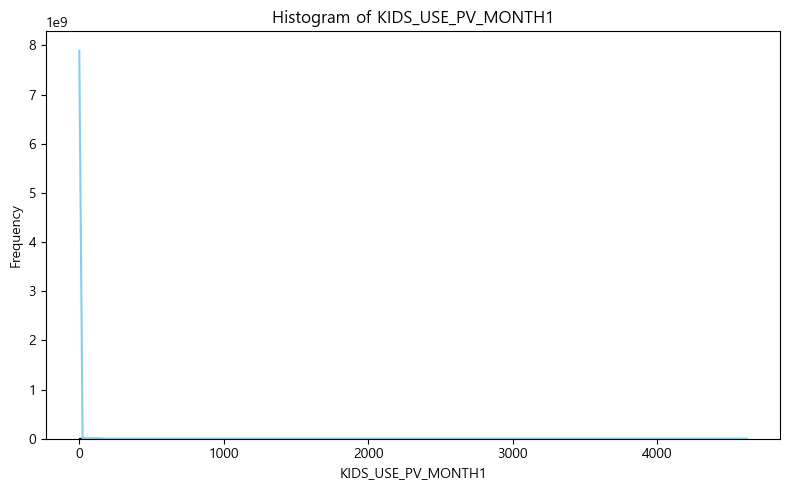

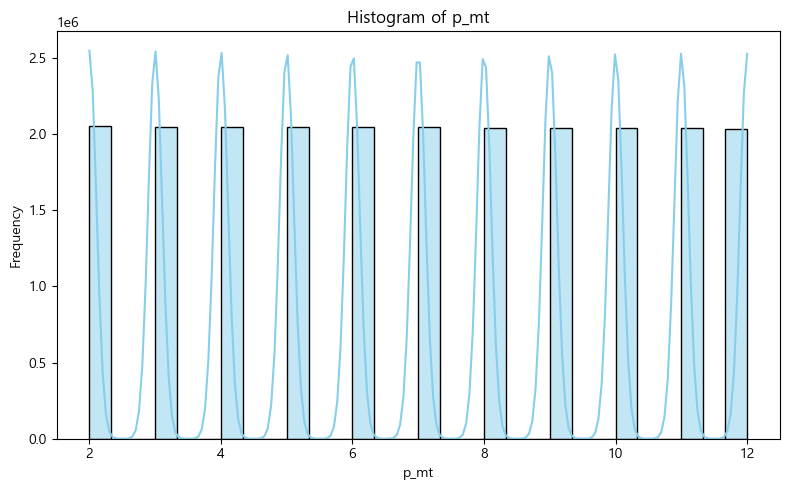

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 히스토그램 그리기
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


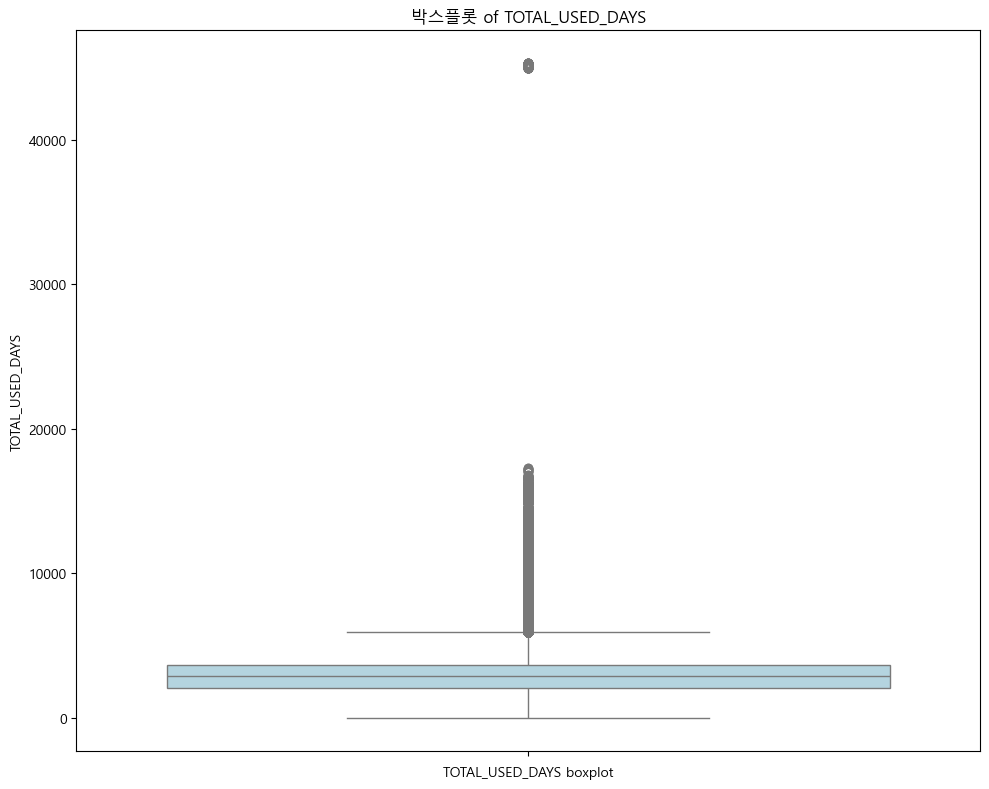

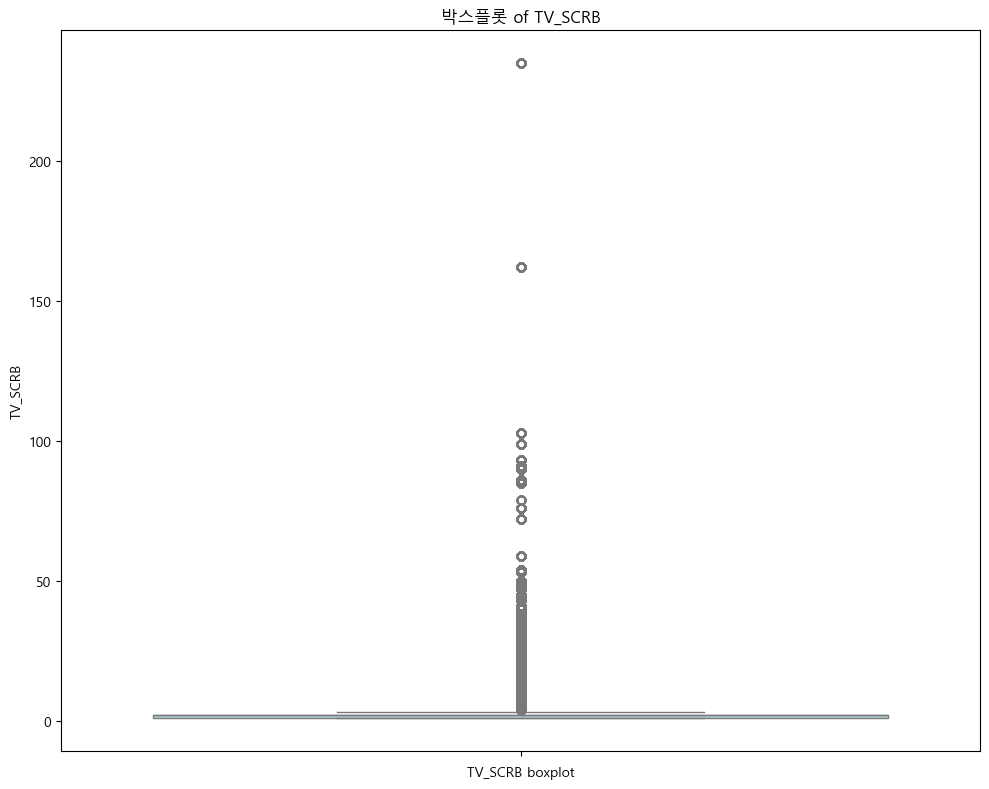

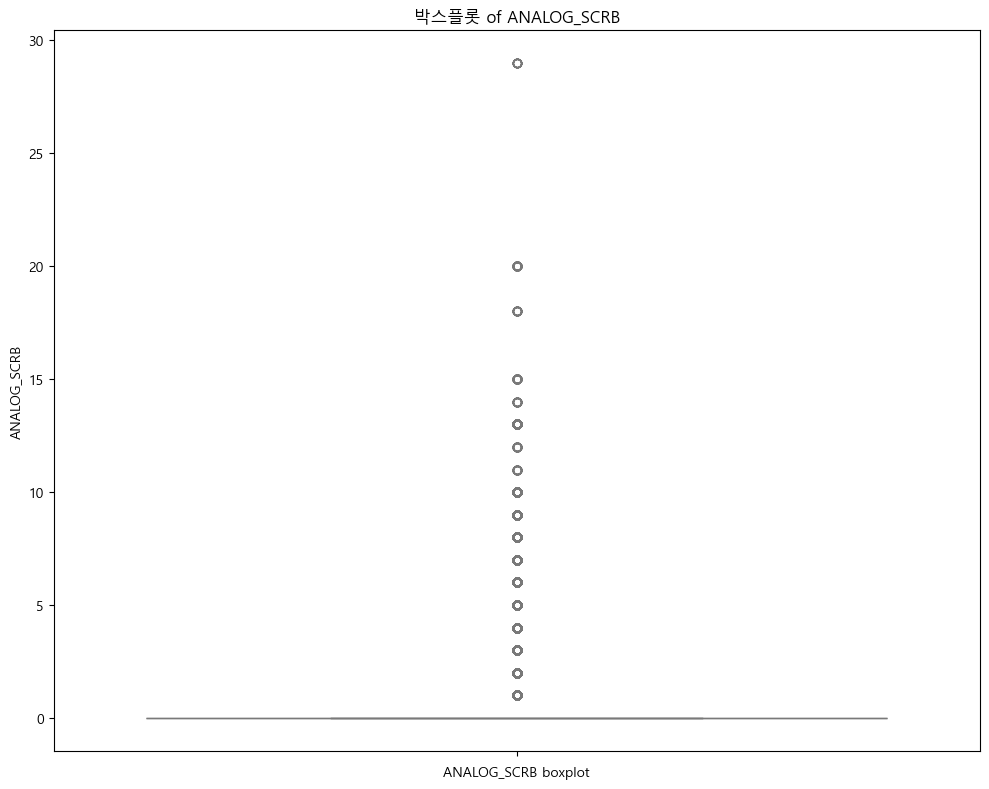

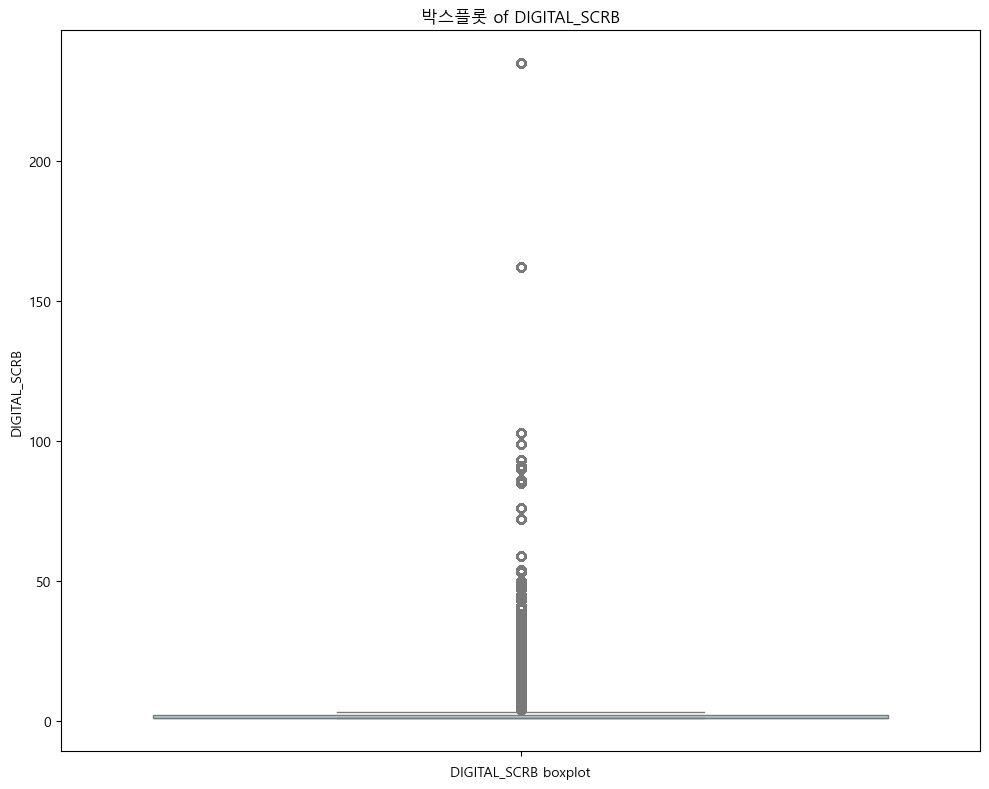

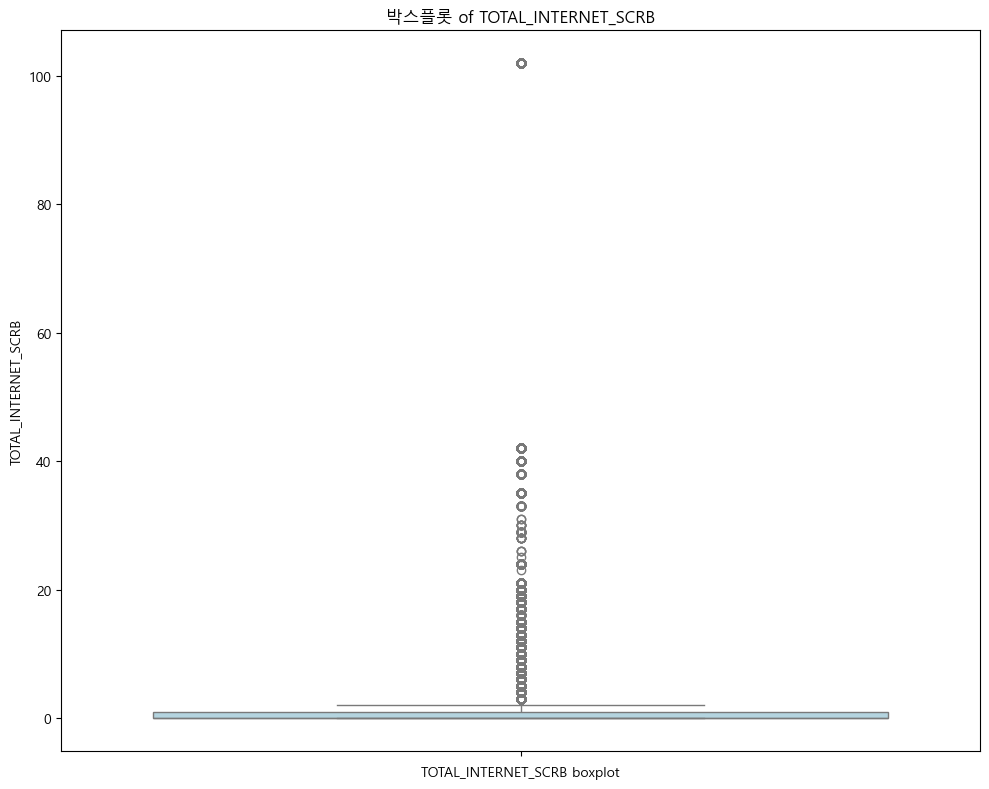

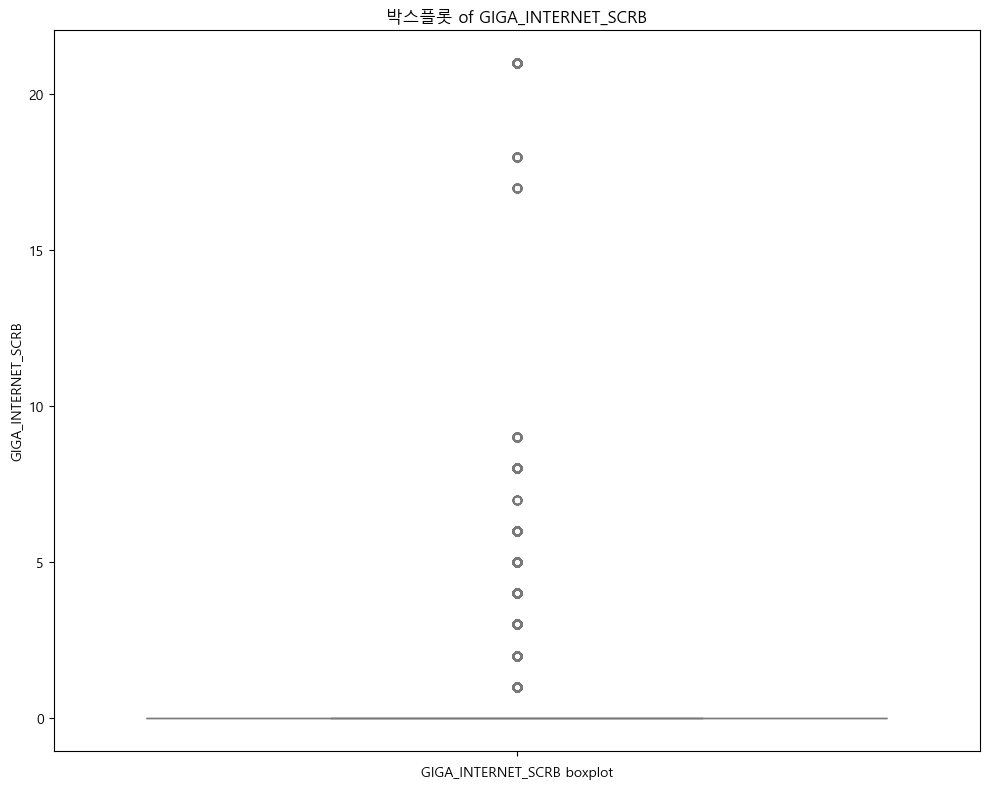

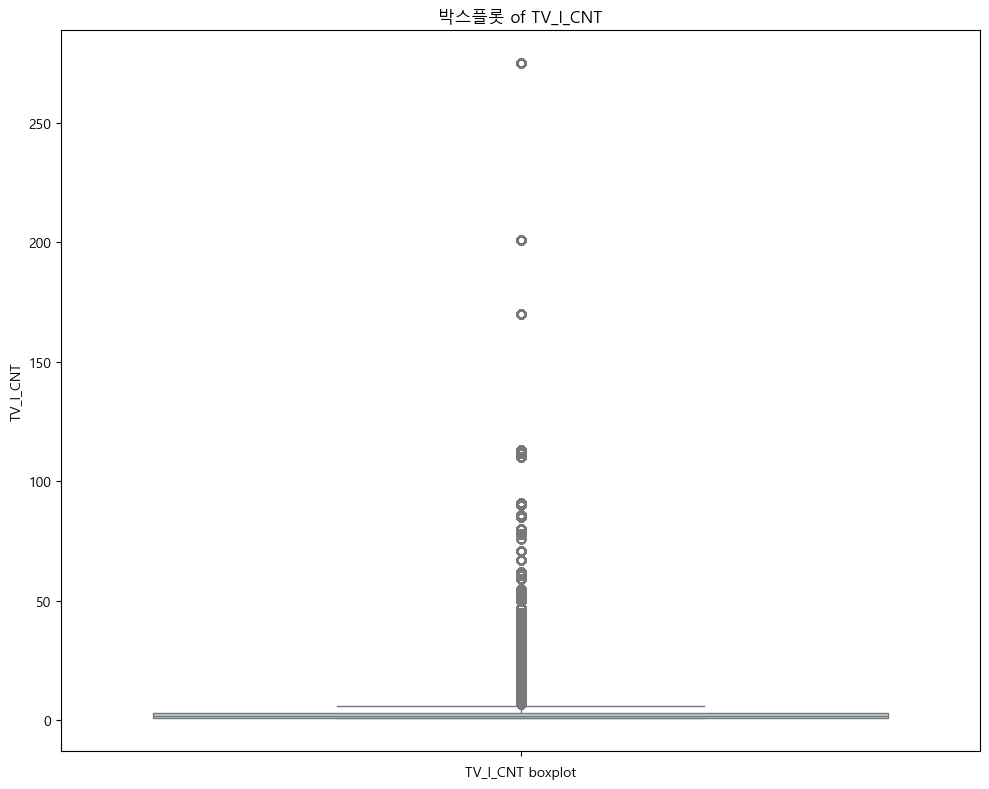

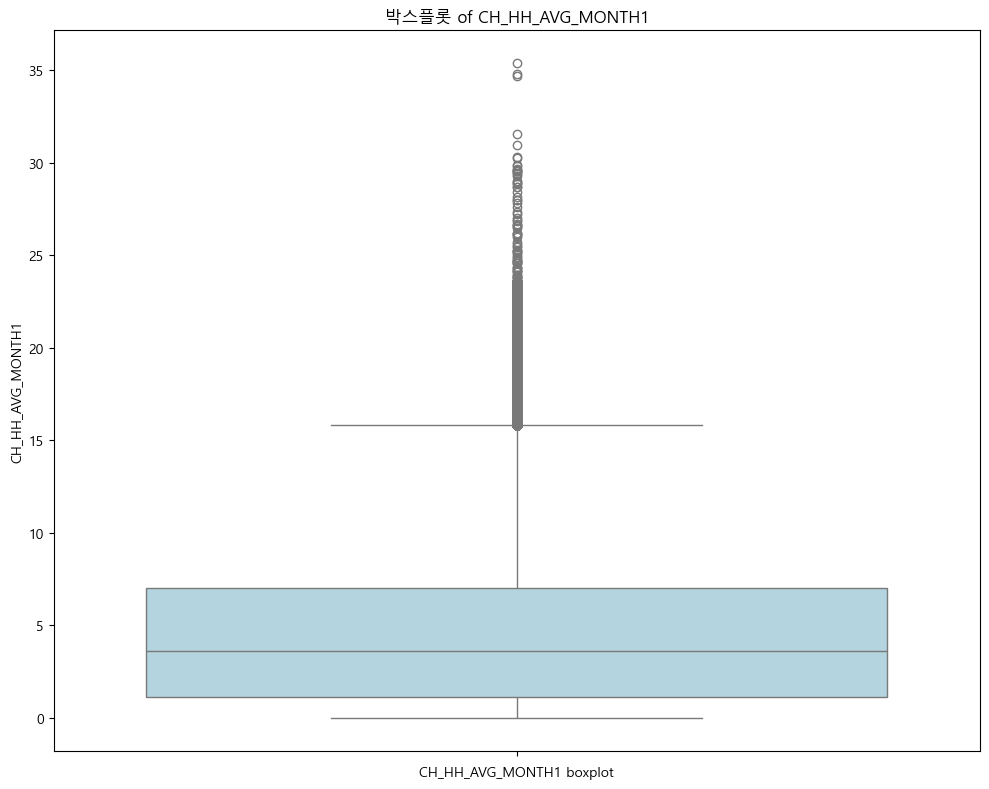

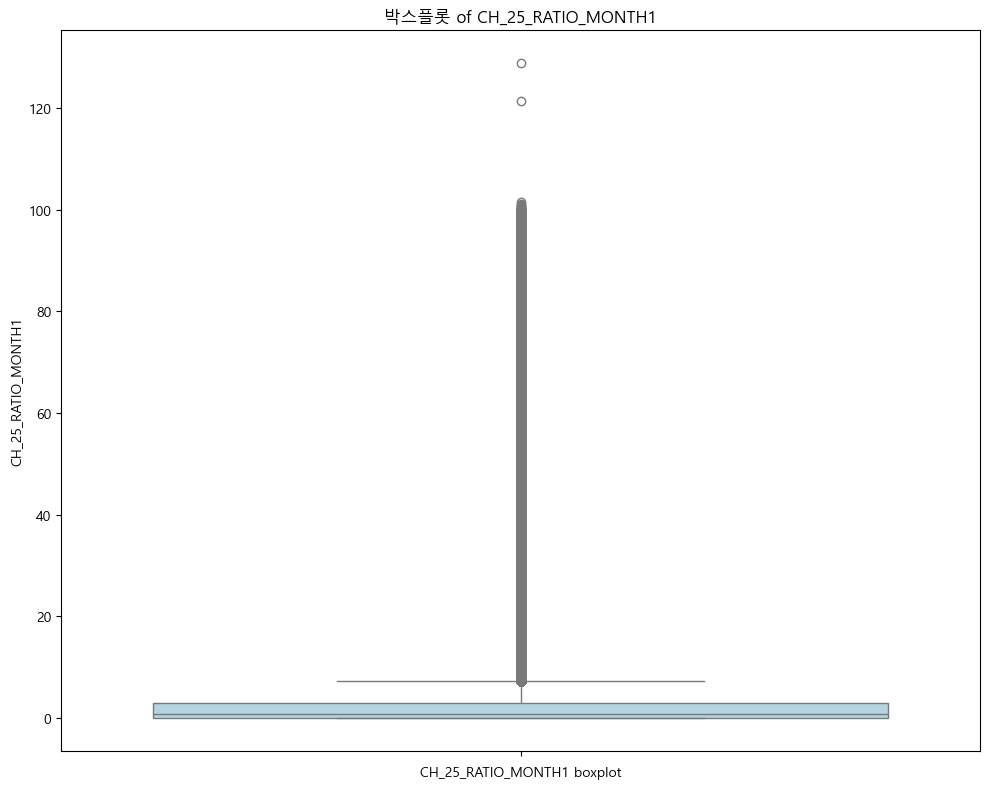

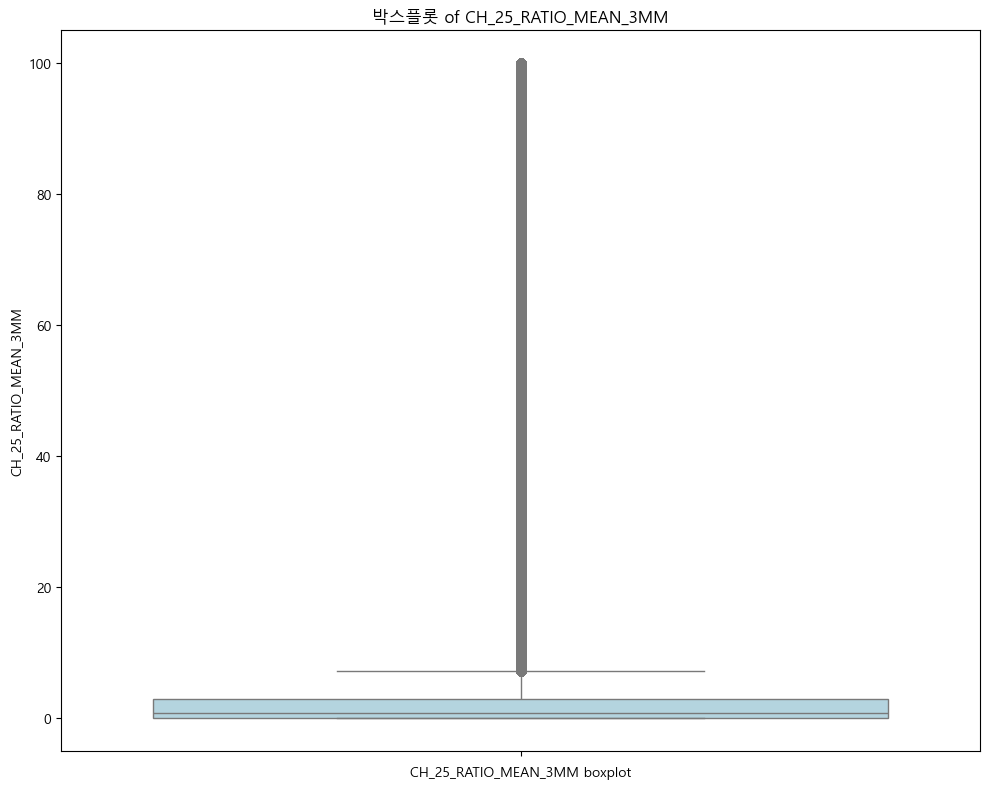

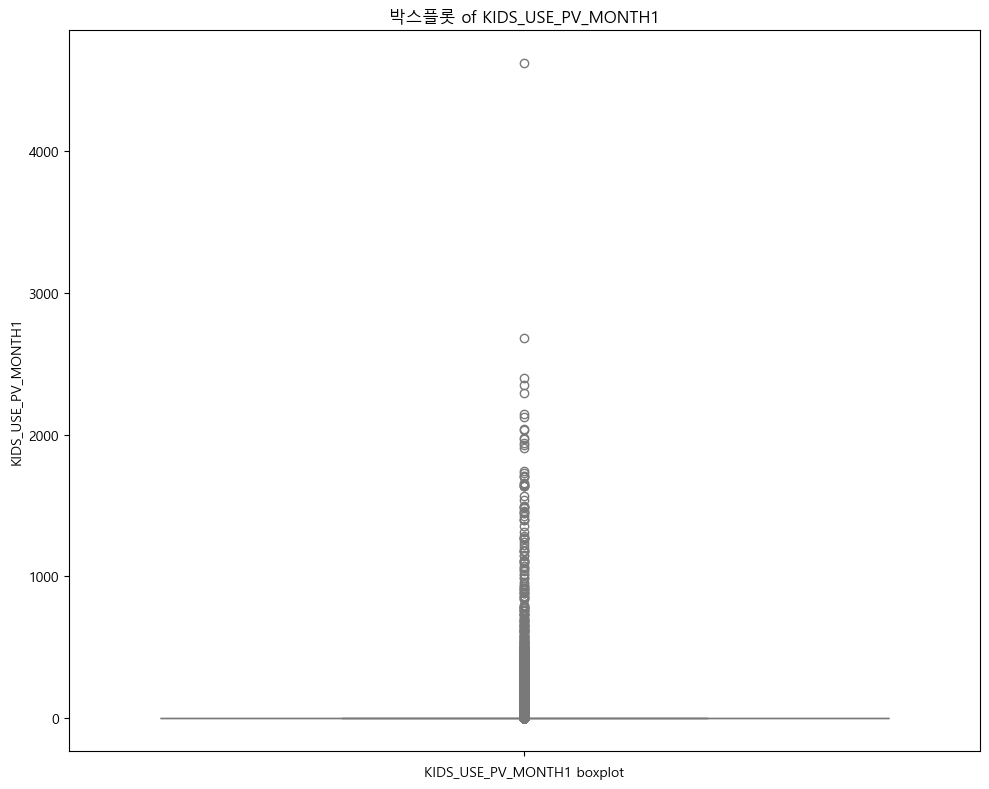

In [37]:
# 박스플롯 그리기
for col in numerical_cols:
    if col != 'p_mt': 
        plt.figure(figsize=(10, 8))
        sns.boxplot(y=df[col], color="lightblue") 
        plt.title(f"박스플롯 of {col}")
        plt.ylabel(col)
        plt.xlabel(f"{col} boxplot")
        plt.tight_layout()
        plt.show()

In [43]:
# IQR, 중앙값, 평균값 계산
for col in numerical_cols:
    print(f"⭐ {col} 변수의 통계 요약")
    
    # 중앙값
    median = df[col].median()
    
    # 평균값
    mean = df[col].mean()
    
    # IQR 계산
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 출력
    print(f"  - 중앙값(Median): {median}")
    print(f"  - 평균값(Mean): {mean:.2f}")
    print(f"  - IQR(Interquartile Range): {IQR}")
    print(f"  - 1분위수(Q1): {Q1}")
    print(f"  - 3분위수(Q3): {Q3}")
    print("-" * 50)


⭐ TOTAL_USED_DAYS 변수의 통계 요약
  - 중앙값(Median): 2920.0
  - 평균값(Mean): 2760.33
  - IQR(Interquartile Range): 1553.0
  - 1분위수(Q1): 2095.0
  - 3분위수(Q3): 3648.0
--------------------------------------------------
⭐ TV_SCRB 변수의 통계 요약
  - 중앙값(Median): 2.0
  - 평균값(Mean): 1.78
  - IQR(Interquartile Range): 1.0
  - 1분위수(Q1): 1.0
  - 3분위수(Q3): 2.0
--------------------------------------------------
⭐ ANALOG_SCRB 변수의 통계 요약
  - 중앙값(Median): 0.0
  - 평균값(Mean): 0.02
  - IQR(Interquartile Range): 0.0
  - 1분위수(Q1): 0.0
  - 3분위수(Q3): 0.0
--------------------------------------------------
⭐ DIGITAL_SCRB 변수의 통계 요약
  - 중앙값(Median): 1.0
  - 평균값(Mean): 1.76
  - IQR(Interquartile Range): 1.0
  - 1분위수(Q1): 1.0
  - 3분위수(Q3): 2.0
--------------------------------------------------
⭐ TOTAL_INTERNET_SCRB 변수의 통계 요약
  - 중앙값(Median): 0.0
  - 평균값(Mean): 0.50
  - IQR(Interquartile Range): 1.0
  - 1분위수(Q1): 0.0
  - 3분위수(Q3): 1.0
--------------------------------------------------
⭐ GIGA_INTERNET_SCRB 변수의 통계 요약
  - 중앙값(Median)

✳️ TOTAL_USED_DAYS:
  - 대부분의 데이터는 0~5000 사이에 밀집되어 있음.
  - 수염 바깥에 이상치가 존재. 상당히 많은 이상치가 관측됨.
  - 특히 최대값은 40,000 ~ 45,000 사이로, 다른 값들과 큰 차이를 보임.
---
✳️ TV_SCRB: (DIGITAL_SCRB도 유사)
  - 데이터의 대부분은 1, 2 사이에 있음. 이는 데이터가 좁은 범위에 밀집되어 있음을 의미함.
  - 이상치는 약 5부터 시작하여 최대 200이상까지 확장됨.
  - 이러한 이상치가 평균값을 중앙값보다 낮게 끌어내릴 가능성이 큼.
---
✳️ ANALOG_SCRB:
  - 대부분의 데이터는 0에 밀집
  - 1 이상의 값부터 이상치로 나타나고, 30 이상까지 확장됨.
---
✳️ TOTAL_INTERNET_SCRB:
  - 중앙값이 0이며, 대부분의 데이터가 0 ~ 1사이에 몰려있음.
  - 2 이상의 값부터 이상치로 나타나며, 일부 데이터는 100 이상까지 확장됨!
---
✳️ GIGA_INTERNET_SCRB:
  - 중앙값과 IQR이 모두 0으로, 대부분의 데이터가 0에 매우 밀집되어 있음.
  - 1 이상의 값부터 이상치로 나타나는것 같고, 일부 데이터는 20 이상까지 확장됨.
  - 이상치의 개수는 그렇게 많지 않음.
---
✳️ TV_I_CNT:
  - IQR이 2.0이므로 데이터가 1~3 사이에 밀집되어 있음을 보여줌.
  - 5 이상의 값부터 이상치로 나타나는것 같고, 일부 데이터는 150 이상까지 확장됨.
  - 이상치가 데이터의 평균에 영향을 주고 있으며, 데이터의 분포를 왜곡하고 있음.
---
✳️ CH_HH_AVG_MONTH1:
  - 중앙값은 3.62로 다른 데이터들보다 데이터가 상대적으로 고르게 분포하고 있음을 나타냄.
  - 데이터의 중앙값은 1.16 ~ 7.03 구간에 위치하고 있음.
  - 15 이상의 값부터 이상치로 나타나는 것 같고, 일부 데이터는 30 이상까지 확장됨.
---
✳️ CH_25_RATIO_MONTH1, CH_25_RATIO_MEAN_3MM:
  - 중앙값은 0.83으로, 데이터가 0 ~ 2.89 사이에 상대적으로 많이 분포하고 있음을 나타냄.
  - 10 이상의 값부터 이상치로 나타나는 것 같고, 일부 데이터는 100 이상까지 확장됨.
---
✳️ KIDS_USE_PV_MONTH1
  - 중앙값과 IQR이 모두 0으로, 데이터의 대부분이 0에 매우 밀집되어있음.
  - 거의 2 이상의 값부터 이상치로 나타나며, 일부 데이터는 2000 이상까지 확장, 4000 이상까지 확장됨.

7. 연속형 변수와 churn과의 관계 확인

In [5]:
df['churn'] = df['churn'].map({"Y":1, "N":0})

Churn과 연속형 변수 간 상관계수:
churn                   1.00
GIGA_INTERNET_SCRB      0.03
TV_I_CNT                0.03
TOTAL_INTERNET_SCRB     0.03
TV_SCRB                 0.02
DIGITAL_SCRB            0.02
ANALOG_SCRB             0.00
KIDS_USE_PV_MONTH1     -0.00
CH_25_RATIO_MONTH1     -0.01
CH_25_RATIO_MEAN_3MM   -0.01
p_mt                   -0.01
TOTAL_USED_DAYS        -0.03
CH_HH_AVG_MONTH1       -0.04
Name: churn, dtype: float64


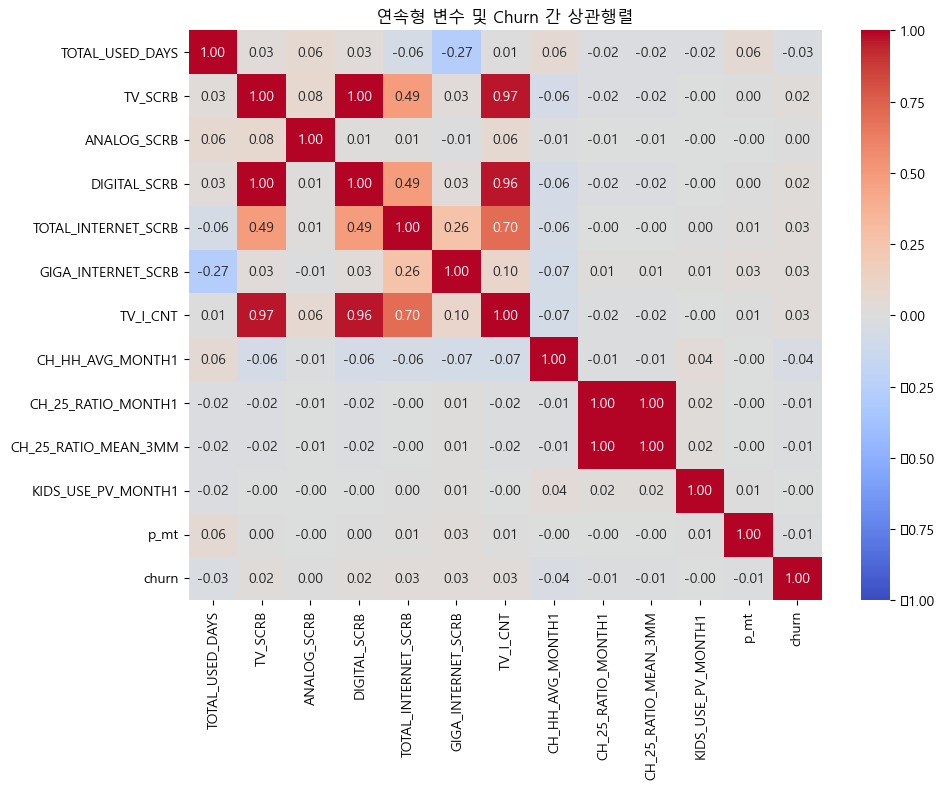

In [9]:
# 1. 연속형 변수 선택
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]

# 2. 상관행렬 계산
correlation_matrix = df_numeric.corr()

# 3. churn과 다른 변수 간의 상관계수 추출
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)

# 4. 결과 출력
print("Churn과 연속형 변수 간 상관계수:")
print(churn_correlation)

# 5. 상관행렬 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("연속형 변수 및 Churn 간 상관행렬")
plt.tight_layout()
plt.show()



1. churn 변수와의 상관관계
    - churn 변수는 다른 연속형 변수들과의 상관계수가 모두 0.01 이하로 나타나서 이는 약한 상관관계를 보임.
    - 가장 높은 상관관계는 TOTAL_INTERNET_SCRB와 GIGA_INTERNET_SCRB로 상관계수가 0.03으로 많이 낮음.
---
2. 변수들 간의 상관관계
  - TV_SCRB와 DIGITAL_SCRB:
    - 상관계수 : 1.00
    - 두 변수는 매우 강한 양의 상관관계를 가지고 있음. 1은 똑같다는 의미로 해석할수도 있음. 이는 두 변수가 유사한 데이터를 나타낼 가능성이 높으며, 다중공산성 문제가 발생할 수 있음.
  - TV_SCRB와 TV_I_CNT:
    - 상관계수 : 0.97
    - 두 변수는 강한 양의 상관관계가 나타났음. 이는 두 변수가 유사한 데이터를 나타낼 가능성이 높으며, 다중공산성 문제가 발생할 수 있음.
  - DIGITAL_SCRB과 TV_I_CNT:
    - 상관계수 : 0.96
    - 두 변수는 강한 양의 상관관계가 나타났음. 이는 두 변수가 유사한 데이터를 나타낼 가능성이 높으며, 다중공산성 문제가 발생할 수 있음.
  - TV_I_CNT와 TOTAL_INTERNET_SCRB:
    - 상관계수 : 0.7
    - 이는 강한 양의 상관관계를 의미함. 서로의 데이터를 파악해봐야겠음.
  - CH_25_RATIO_MEAN_3MM과 CH_25_RATIO_MONTH1:
    - 상관계수 : 1.00
    - 두 변수는 매우 강한 양의 상관관계를 가지고 있음. 1은 똑같다는 의미로 해석할수도 있음. 이는 두 변수가 유사한 데이터를 나타낼 가능성이 높으며, 다중공산성 문제가 발생할 수 있음.
---
데이터 전처리 과정에서 확인해서 제거를 해봐야겠음.